## BBM409 Introduction to Machine Learning Lab.  Fall 2022.
# Assignment 1: PART 1 :  Personality Classification

### Contributors:

### Ali Argun Sayilgan   : 21827775
### Mehmet Giray Nacakci :  21989009

## Please run this report with   "RUN ALL" command


# Dataset

The dataset consists of 10k answers for 60 questions from the 16 Personality Test and their ground truth labels(Personality Types). <br />
Answers to the questions are stored in following manner:

Fully Agree: 3 <br />
Partially Agree: 2  <br />
Slightly Agree: 1 <br />
Neutral: 0 <br />
Slightly disagree: -1 <br />
Partially disagree: -2 <br />
Fully disagree: -3 <br />


In [ ]:
import pandas as pd
pd.set_option('display.precision', 6)
import numpy as np

df = pd.read_csv("subset_16P.csv", encoding='cp1252')
df.head()

,Response Id,You regularly make new friends.,You spend a lot of your free time exploring various random topics that pique your interest,Seeing other people cry can easily make you feel like you want to cry too,You often make a backup plan for a backup plan.,"You usually stay calm, even under a lot of pressure","At social events, you rarely try to introduce yourself to new people and mostly talk to the ones you already know",You prefer to completely finish one project before starting another.,You are very sentimental.,You like to use organizing tools like schedules and lists.,...,You believe that pondering abstract philosophical questions is a waste of time.,"You feel more drawn to places with busy, bustling atmospheres than quiet, intimate places.",You know at first glance how someone is feeling.,You often feel overwhelmed.,You complete things methodically without skipping over any steps.,You are very intrigued by things labeled as controversial.,You would pass along a good opportunity if you thought someone else needed it more.,You struggle with deadlines.,You feel confident that things will work out for you.,Personality
0,35874,-1,0,-1,1,-1,-2,-2,0,-1,...,0,3,0,0,0,0,1,-1,0,ENTP
1,42624,0,0,1,0,0,0,-1,0,0,...,0,2,0,0,0,0,-1,-3,2,INTP
2,55199,0,0,-2,-1,2,-2,0,0,-1,...,0,0,0,1,0,0,3,0,0,ESTP
3,52983,0,0,0,1,-2,-1,0,0,1,...,1,1,0,-1,0,-1,2,-2,0,ENTP
4,22864,0,0,2,1,0,-2,-1,0,1,...,1,-2,0,1,0,0,0,-2,2,ENFJ


# Preprocessing the dataset

In order to use string type ground truth labels in our ML algorithms more effectively, we preferred to convert them to integers ranged from 0 to 15. 


In [ ]:
numberOfClasses = len(df["Personality"].unique())
personality_types =[ "ESTJ", "ENTJ", "ESFJ", "ENFJ", "ISTJ", "ISFJ",
"INTJ", "INFJ", "ESTP", "ESFP", "ENTP", "ENFP",
"ISTP", "ISFP", "INTP", "INFP" ]
df.Personality = df.Personality.astype("category", personality_types).cat.codes
df.Personality.describe()

count    10000.000000
mean         7.500200
std          4.621811
min          0.000000
25%          3.000000
50%          8.000000
75%         12.000000
max         15.000000
Name: Personality, dtype: float64

In [ ]:
df.Personality.value_counts()

9     662
3     641
15    641
7     640
0     632
1     629
14    625
8     625
11    624
12    624
2     622
4     620
13    616
5     615
10    596
6     588
Name: Personality, dtype: int64

## Number of occurences of class types
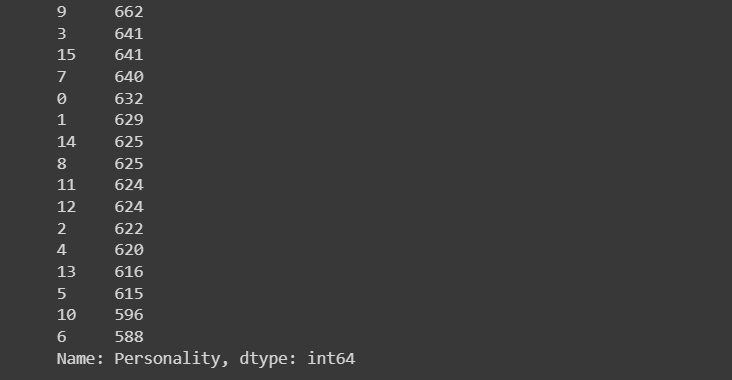
<br /> <br />
#### As can seen, there isn't much of an inbalance for classes at the dataset.

Later, we splitted the dataset to X(question answers) and y(ground truth Personality labels).

In [ ]:
X = df.drop(['Response Id','Personality'], axis=1)
y = df.Personality

X= X.to_numpy()
Y= y.to_numpy()

## Feature Normalization

Some machine learning algorithms are sensitive to feature scaling while others are virtually invariant to it.
Since we are using KNN classifier in this project, if we don't use any feature normalization methods, some features of the dataset can influence the prediction more than other features and this generally isn't a thing we want.





In [ ]:
df.describe()

,Response Id,You regularly make new friends.,You spend a lot of your free time exploring various random topics that pique your interest,Seeing other people cry can easily make you feel like you want to cry too,You often make a backup plan for a backup plan.,"You usually stay calm, even under a lot of pressure","At social events, you rarely try to introduce yourself to new people and mostly talk to the ones you already know",You prefer to completely finish one project before starting another.,You are very sentimental.,You like to use organizing tools like schedules and lists.,...,You believe that pondering abstract philosophical questions is a waste of time.,"You feel more drawn to places with busy, bustling atmospheres than quiet, intimate places.",You know at first glance how someone is feeling.,You often feel overwhelmed.,You complete things methodically without skipping over any steps.,You are very intrigued by things labeled as controversial.,You would pass along a good opportunity if you thought someone else needed it more.,You struggle with deadlines.,You feel confident that things will work out for you.,Personality
count,10000.000000,10000.00000,10000.000000,10000.00000,10000.000000,10000.00000,10000.000000,10000.00000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000
mean,30033.526600,-0.00420,0.002100,0.01470,-0.211000,-0.14970,0.012500,-0.45950,0.002400,0.130300,...,0.000700,0.123400,-0.002900,0.258500,-0.004600,-0.002400,0.1192,-0.027200,0.100300,7.500200
std,17310.103985,0.37013,0.370013,1.53796,1.523388,1.49416,1.514983,1.45278,0.362777,1.535629,...,0.364572,1.528073,0.371087,1.495494,0.363857,0.368792,1.5250,1.531305,1.561885,4.621811
min,0.000000,-1.00000,-1.000000,-3.00000,-3.000000,-3.00000,-3.000000,-3.00000,-1.000000,-3.000000,...,-1.000000,-3.000000,-1.000000,-3.000000,-1.000000,-1.000000,-3.0000,-3.000000,-3.000000,0.000000
25%,15058.750000,0.00000,0.000000,-1.00000,-1.000000,-1.00000,-1.000000,-2.00000,0.000000,-1.000000,...,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,-1.0000,-1.000000,-1.000000,3.000000
50%,29961.500000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,-1.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,8.000000
75%,45206.750000,0.00000,0.000000,1.00000,1.000000,1.00000,1.000000,0.00000,0.000000,1.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.0000,1.000000,1.000000,12.000000
max,59997.000000,1.00000,1.000000,3.00000,3.000000,3.00000,3.000000,3.00000,1.000000,3.000000,...,1.000000,3.000000,1.000000,3.000000,1.000000,1.000000,3.0000,3.000000,3.000000,15.000000



As can seen from the table, the distribution of answers for each column is different. Even though possible answer scores range from -3 to 3, answers for some questions are ranging between different numbers. Thus, when we don't use feature normalization, some columns are going to influence outcome more. <br />
In this project, we will be using MinMaxScaler for our feature normalization algorithm.





### MinMaxScaler


MinMaxScaler shrinks the data within the given range, usually 0 to 1. In this project we will shrink each column to 0 to 1 range with the formula given below.

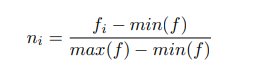

<br />
Another important point to mention is that when scaling your train and test datasets, you need to avoid information leakage onto the test dataset. So if you scale your test dataset with the min max values from test dataset itself, you leak information of min max values of the whole test dataset, through your model and it's a bad practice. Thus you must use the min max values from the training dataset while scaling.

In [ ]:
class MinMaxScaler():
    def __init__(self):
        self.mins = []
        self.maxes = []
        
    def fit_transform(self, X):
        self.mins = X.min(axis=0)
        self.maxes = X.max(axis=0)
        maxMinusMin = self.maxes - self.mins
        return (X - self.mins) / maxMinusMin
    
    
    def transform(self, X):
        maxMinusMin = self.maxes - self.mins
        return (X - self.mins) / maxMinusMin


# KFold

Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample.

The procedure has a single parameter called k that refers to the number of groups that a given data sample is to be split into. As such, the procedure is often called k-fold cross-validation. When a specific value for k is chosen, it may be used in place of k in the reference to the model, such as k=10 becoming 10-fold cross-validation.

Cross-validation is primarily used in applied machine learning to estimate the skill of a machine learning model on unseen data. That is, to use a limited sample in order to estimate how the model is expected to perform in general when used to make predictions on data not used during the training of the model.

It is a popular method because it is simple to understand and because it generally results in a less biased or less optimistic estimate of the model skill than other methods, such as a simple train/test split.

The general procedure is as follows:


1.   Shuffle the dataset randomly.
2.   Split the dataset into k groups
3.   For each unique group:
  1.   Take the group as a hold out or test data set
  2.   Take the remaining groups as a training data set
  3.   Fit a model on the training set and evaluate it on the test set
  4.   Retain the evaluation score and discard the model
4.   Summarize the skill of the model using the sample of model evaluation scores

<br />
[source] (https://machinelearningmastery.com/k-fold-cross-validation/)


In [ ]:
import random

class KFold():
    def __init__(self,n_splits=5, shuffle=True, random_state=42):
        self.shuffle = shuffle
        self.n_splits=n_splits
        self.random_state= random_state

    # Fisher-Yates Shuffle Algorithm
    def shuffler (self, arr, n):
        random.seed(n)
        rowSize = arr.shape[0]
        for i in range(rowSize-1,0,-1):
            
            # random index from 0 to i
            j = random.randint(0,i+1)
            
            # Swap with random index
            arr[[i, j]] = arr[[j, i]]
        return arr


    def split(self, X, y):
        if(self.shuffle):
            X = self.shuffler(X, self.random_state)
            y = self.shuffler(y, self.random_state)          
        
        rowSize = len(X)
        testSetSize = rowSize // self.n_splits
        for i in range(self.n_splits):
            if(i==0):
                x_train = X[(i+1)*testSetSize :,]
                y_train = Y[(i+1)*testSetSize :,]
            elif(i==self.n_splits-1):
                x_train = X[:i*testSetSize,]
                y_train = Y[:i*testSetSize,]
            else:
                # [ row1,row2, ..., x_train_rows, rowk, ...]
                # appending rows prior to x_train with rows comes after x_train
                x_train_smaller_indices = X[:i*testSetSize,]
                y_train_smaller_indices = Y[:i*testSetSize,]
                x_train = np.append(
                    x_train_smaller_indices, X[(i+1)*testSetSize :,], axis = 0
                )
                y_train = np.append(
                    y_train_smaller_indices, Y[(i+1)*testSetSize :,], axis = 0
                )
            

            if(i!=self.n_splits-1):
                x_test = X[i*testSetSize : (i+1)*testSetSize,]
                y_test = Y[i*testSetSize : (i+1)*testSetSize,]
            else:
#           because we calculate testSetSize with //, 
#           last split must finish through the end of the whole array
                x_test = X[i*testSetSize :,]
                y_test = Y[i*testSetSize :,]
            yield (x_train, x_test, y_train, y_test)


# KNNClassifier 

KNN is an instance-based learning method. Instance-based learning (memory-based learning, lazy learning) is a family of learning algorithms that, instead of performing explicit generalization, compare new problem instances with instances seen in training, which have been stored in memory.

There are efficient implementations to store the data using complex data structures like k-d trees to make look-up and matching of new patterns during prediction more efficient. But in this project we will be making use of basic numpy arrays.

## Prediction algorithm
Predictions are made for a new instance (x) by searching through the entire training set for the K most similar instances (the neighbors) and summarizing the output variable for those K instances. For regression this might be the mean output variable, in classification this might be the mod (or most common) class value.

To determine which of the K instances in the training dataset are most similar to a new input, a distance measure is used. The most popular distance measures are *Euclidean Distance*, *Manhattan Distance*, *Minkowski Distance*, *Hamming Distance*. In this project we will be using Euclidean distance.


**Euclidean distance formula:** <br />
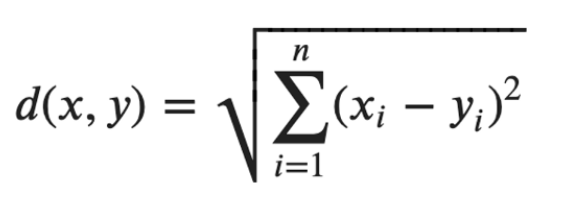

In [ ]:
class KNNClassifier():
    def __init__(self, n_neighbors=5, weights='uniform', n_classes = 16):

        self.X_train = None
        self.y_train = None
        
        self.n_classes = n_classes
        self.n_neighbors = n_neighbors
        self.weights = weights

        
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def euclidian_distance(self, a, b):
        distances = np.sqrt(np.sum((a - b)**2, axis=1))
        # prevent division by zero
        distances[np.where(distances < 0.00001)] = 0.00001
        return distances


    def kneighbors(self, X_test, return_distance=False):

        dist = []
        neigh_ind = []

        point_dist = [self.euclidian_distance(x_test, self.X_train) for x_test in X_test]

        for row in point_dist:
            enum_neigh = enumerate(row)
            sorted_neigh = sorted(enum_neigh,
                                  key=lambda x: x[1])[:self.n_neighbors]

            ind_list = [tup[0] for tup in sorted_neigh]
            dist_list = [tup[1] for tup in sorted_neigh]

            dist.append(dist_list)
            neigh_ind.append(ind_list)

        if return_distance:
            return np.array(dist), np.array(neigh_ind)

        return np.array(neigh_ind)


    def predict(self, X_test):

        # non-weighted knn, majority voting of neighbors for classification
        if self.weights == 'uniform':
            neighbors = self.kneighbors(X_test)
            y_pred = np.array([
                np.argmax(np.bincount(self.y_train[neighbor]))
                for neighbor in neighbors
            ])
            return y_pred


        # weighted knn, voting based on weights of neighbors
        elif self.weights == 'distance':

            dist, neigh_ind = self.kneighbors(X_test, return_distance=True)

            inv_dist = 1 / dist

            mean_inv_dist = inv_dist / np.sum(inv_dist, axis=1)[:, np.newaxis]

            proba = []

            for i, row in enumerate(mean_inv_dist):

                row_pred = self.y_train[neigh_ind[i]]

                for k in range(self.n_classes):
                    indices = np.where(row_pred == k)
                    prob_ind = np.sum(row[indices])
                    proba.append(np.array(prob_ind))

            predict_proba = np.array(proba).reshape(X_test.shape[0],
                                                    self.n_classes)

            y_pred = np.array([np.argmax(item) for item in predict_proba])

            return y_pred


        # used for interpretation of misclassified samples, return also nearest neighbors
        elif self.weights == 'uniform_neighbors':
            neighbors = self.kneighbors(X_test)  # nearestNeighborsIndices_of_all_testSamples
            y_pred = np.array([
                np.argmax(np.bincount(self.y_train[neighbor]))
                for neighbor in neighbors
            ])
            return y_pred, neighbors


# Pipeline

A pipeline is a linear sequence of data preparation options, modeling operations, and prediction transform operations.

It allows the sequence of steps to be specified, evaluated, and used as an atomic unit. Like:


1.   [Input], [Normalization], [KNN Classifier], [Predictions]
2.   [Input], [Standardization], [RFE], [SVM], [Predictions]





In [ ]:
# from scipy import stats

class Pipeline():
    def __init__(self, scaler=None, classifier=None):
        self.scaler = scaler
        self.classifier = classifier

    def execute(self,x_train, x_test, y_train):
        if(self.scaler is not None):
            x_train = self.scaler.fit_transform(x_train)
            x_test = self.scaler.transform(x_test)
        if(self.classifier is not None):
            self.classifier.fit(x_train, y_train)
            return self.classifier.predict(x_test)
            

# Classification metrics

A classifier is only as important as the metric used to evaluate it.

If you choose the wrong metric to evaluate your models, you are likely to choose a poor model, or in the worst case, be misled about the expected performance of your model.

And choosing the right classification metric is particularly difficult for imbalanced classification problems. Firstly, because most of the standard metrics that are widely used assume a balanced class distribution, and because typically not all classes, and therefore, not all prediction errors, are equal for imbalanced classification.

In this project we will be using **Accuracy**, **Precision** and **Recall** metrics to evaluate our ML models' predictions.

### Accuracy <br />
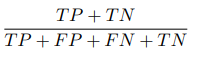



In [ ]:
def accuracy(pred, actual):
    return sum(pred == actual) / len(pred)


### Precision <br />
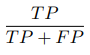 <br />
Since there are 16 ground truth labels, we take the average precision of all labels.


In [ ]:
def precision(pred, actual):
    if(len(pred) == 0 or len(pred) != len(actual)):
        return -1
    labels= []
    truePositivesPerLabel = {}
    falsePositivesPerLabel = {}
    precisionPerLabel = {}

    
    for i in range(len(pred)):
        prediction = pred[i]
        if prediction not in labels:
            labels.append(prediction)
            truePositivesPerLabel[prediction] = 0
            falsePositivesPerLabel[prediction] = 0
        
        if(pred[i] == actual[i]):
            truePositivesPerLabel[prediction] +=1
        else:
            falsePositivesPerLabel[prediction] +=1
    
    # count of the labels that are existed inside the ground truth or prediction
    existedLabelCount = 0
    
    precisionSum = 0
    for label in labels:
        denominator = truePositivesPerLabel[label] + falsePositivesPerLabel[label]
        if(denominator >=0):
            existedLabelCount +=1
            precisionSum += truePositivesPerLabel[label] / denominator
    
    return precisionSum / existedLabelCount
        
        

### Recall <br />
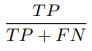
<br />
Since there are 16 ground truth labels, we take the average recall precision of all labels.

In [ ]:
def recall(pred, actual):
    if(len(pred) == 0 or len(pred) != len(actual)):
        return -1
    labels= []
    truePositivesPerLabel = {}
    falseNegativesPerLabel = {}
    recallPerLabel = {}
    
    for i in range(len(actual)):
        actualClass = actual[i]
        if actualClass not in labels:
            labels.append(actualClass)
            truePositivesPerLabel[actualClass] = 0
            falseNegativesPerLabel[actualClass] = 0
        
        if(pred[i] == actual[i]):
            truePositivesPerLabel[actualClass] +=1
        else:
            falseNegativesPerLabel[actualClass] +=1
    
    # count of the labels that are existed inside the ground truth or prediction
    existedLabelCount = 0
    
    recallSum = 0
    for label in labels:
        denominator = truePositivesPerLabel[label] + falseNegativesPerLabel[label]
        if(denominator >=0):
            existedLabelCount +=1
            recallSum += truePositivesPerLabel[label] / denominator
    
    return recallSum / existedLabelCount


# Cross validation scores

When evaluating different settings (“hyperparameters”) for estimators, there is still a risk of overfitting on the test set because the parameters can be tweaked until the estimator performs optimally. This way, knowledge about the test set can “leak” into the model and evaluation metrics no longer report on generalization performance. To solve this problem, yet another part of the dataset can be held out as a so-called “validation set”: training proceeds on the training set, after which evaluation is done on the validation set, and when the experiment seems to be successful, final evaluation can be done on the test set.

However, by partitioning the available data into three sets, we drastically reduce the number of samples which can be used for learning the model, and the results can depend on a particular random choice for the pair of (train, validation) sets.


A solution to this problem is a procedure called cross-validation. A test set should still be held out for final evaluation, but the validation set is no longer needed when doing CV. In the basic approach, called k-fold CV, the training set is split into k smaller setss. The following procedure is followed for each of the k “folds”:
  * A model is trained using  of the folds as training data;
  * the resulting model is validated on the remaining part of the data (i.e., it is used as a test set to compute a performance measure such as accuracy).

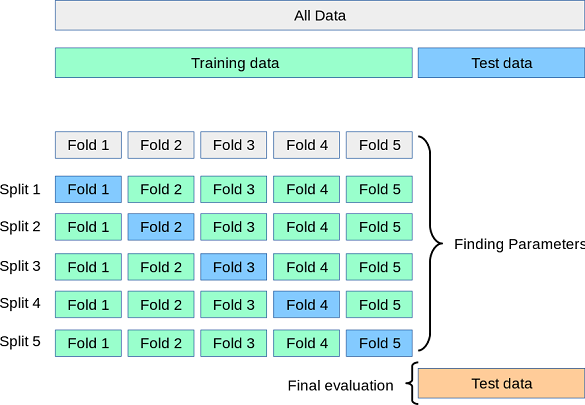



In [ ]:
def cross_val_score(X, Y, cv, pipeline):

    accuracy_folds = []
    precision_folds = []
    recall_folds = []

    # for each Fold of 5-fold-validation
    for (x_train, x_test, y_train, y_test) in cv.split(X,Y): 
        y_pred = pipeline.execute(x_train, x_test, y_train)

        accuracy_folds.append(accuracy(y_pred, y_test))
        precision_folds.append(recall(y_pred, y_test))
        recall_folds.append(precision(y_pred, y_test))

    # averages of folds
    accuracy_folds.append(sum(accuracy_folds)/5)
    precision_folds.append(sum(precision_folds)/5)
    recall_folds.append(sum(recall_folds)/5)

    return accuracy_folds, precision_folds, recall_folds

# Run non-weighted and weighted KNN models   (20 variations)

Now we will be comparing our models' performance with/without feature normalization and with different k_neighbors values as KNNClassifier parameter.

In [ ]:
cv = KFold(5, shuffle=True, random_state=24)
scaler = MinMaxScaler()
neighborVariations = [1,3,5,7,9]

accuracy_table_columns = []
precision_table_columns = []
recall_table_columns = []

import time

def run_all_models():
    print(" \nResults of 20 KNN model variations will be ready after ABOUT  25  MINUTES  of execution. Please wait... \n")
    progress = 1
    start = time.time()

    """  ***   NON-WEIGHTED KNN   *** """
    for k in neighborVariations:   # THIS LOOP TAKES ABOUT 10 MINUTES TO COMPLETE

        knnUniform = KNNClassifier(n_neighbors=k, weights='uniform', n_classes=numberOfClasses)

        # with feature normalization
        print("  KNN model variation no:   " + str(progress) + "  is started being processed..." )
        pipeline = Pipeline(scaler=scaler, classifier=knnUniform)
        accuracies, precisions, recalls = cross_val_score(X, Y, cv, pipeline)
        accuracy_table_columns.append(accuracies)
        precision_table_columns.append(precisions)
        recall_table_columns.append(recalls)
        print("   KNN model variation no:  " + str(progress) + "  processing is finished.\n" )
        progress += 1

        # without feature normalization
        print("  KNN model variation no:   " + str(progress) + "  is started being processed..." )
        pipeline = Pipeline(classifier=knnUniform)
        accuracies, precisions, recalls = cross_val_score(X, Y, cv, pipeline)
        accuracy_table_columns.append(accuracies)
        precision_table_columns.append(precisions)
        recall_table_columns.append(recalls)
        print("   KNN model variation no:  " + str(progress) + "  processing is finished.\n" )
        progress += 1


    """  ***   WEIGHTED KNN   *** """
    for k in neighborVariations:   # THIS LOOP TAKES ABOUT 15 MINUTES TO COMPLETE

        knnDistance = KNNClassifier(n_neighbors=5, weights='distance', n_classes=numberOfClasses)

        # with feature normalization
        print("  KNN model variation no:   " + str(progress) + "  is started being processed..." )
        pipeline = Pipeline(scaler=scaler, classifier=knnDistance)
        accuracies, precisions, recalls = cross_val_score(X, Y, cv, pipeline)
        accuracy_table_columns.append(accuracies)
        precision_table_columns.append(precisions)
        recall_table_columns.append(recalls)
        print("   KNN model variation no:  " + str(progress) + "  processing is finished.\n" )
        progress += 1

        # without feature normalization
        print("  KNN model variation no:   " + str(progress) + "  is started being processed..." )
        pipeline = Pipeline(classifier=knnDistance)
        accuracies, precisions, recalls = cross_val_score(X, Y, cv, pipeline)
        accuracy_table_columns.append(accuracies)
        precision_table_columns.append(precisions)
        recall_table_columns.append(recalls)
        print("   KNN model variation no:   " + str(progress) + "  processing is finished.\n" )
        progress += 1


    # model calculations are finished.
    finish = time.time()
    seconds = finish-start
    minutes = seconds//60
    seconds -= 60*minutes
    print("Results of 20 KNN model variations are ready in the sections below. Thank you for your patience.")
    print('Elapsed time is:   %d:%d   minutes:seconds' %(minutes,seconds))


run_all_models()

 
Results of 20 KNN model variations will be ready after ABOUT  25  MINUTES  of execution. Please wait... 

  KNN model variation no:   1  is started being processed...
   KNN model variation no:  1  processing is finished.

  KNN model variation no:   2  is started being processed...
   KNN model variation no:  2  processing is finished.

  KNN model variation no:   3  is started being processed...
   KNN model variation no:  3  processing is finished.

  KNN model variation no:   4  is started being processed...
   KNN model variation no:  4  processing is finished.

  KNN model variation no:   5  is started being processed...
   KNN model variation no:  5  processing is finished.

  KNN model variation no:   6  is started being processed...
   KNN model variation no:  6  processing is finished.

  KNN model variation no:   7  is started being processed...
   KNN model variation no:  7  processing is finished.

  KNN model variation no:   8  is started being processed...
   KNN model

# Cross Validation Scores (Tables will be ready after about 25 minutes of execution)

# Accuracy Results Table

In [ ]:
def draw_accuracy_table():
    print("------ Accuracy - for 20 model variations ------")
    accuracy_rows = np.transpose(np.array(accuracy_table_columns))
    accuracy_table = pd.DataFrame(accuracy_rows, columns = ['1: k=1 w- n+','2: k=1 w- n-','3: k=3 w- n+','4: k=3 w- n-','5: k=5 w- n+','6: k=5 w- n-','7: k=7 w- n+','8: k=7 w- n-','9: k=9 w- n+','10: k=9 w- n-','11: k=1 w+ n+','12: k=1 w+ n-','13: k=3 w+ n+','14: k=3 w+ n-','15: k=5 w+ n+','16: k=5 w+ n-','17: k=7 w+ n+','18: k=7 w+ n-','19: k=9 w+ n+','20: k=9 w+ n-'])
    accuracy_table.index = ['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5', 'Average of Folds']

    display(accuracy_table.iloc[:, :10].head(6))
    display(accuracy_table.iloc[:, 10:].head(6))

    print("model variations encoding: \n k=  : k parameter of KNN \n w+  :       weighted KNN \n w-  :   non-weighted KNN \n n+  :    with feature normalization \n n-  : without feature normalization \n")

draw_accuracy_table()

------ Accuracy - for 20 model variations ------


,1: k=1 w- n+,2: k=1 w- n-,3: k=3 w- n+,4: k=3 w- n-,5: k=5 w- n+,6: k=5 w- n-,7: k=7 w- n+,8: k=7 w- n-,9: k=9 w- n+,10: k=9 w- n-
Fold 1,0.9645,0.9750,0.9790,0.9835,0.9820,0.9870,0.9850,0.9910,0.9850,0.9900
Fold 2,0.9635,0.9740,0.9750,0.9875,0.9865,0.9900,0.9850,0.9840,0.9845,0.9895
Fold 3,0.9565,0.9760,0.9760,0.9890,0.9800,0.9900,0.9845,0.9915,0.9845,0.9840
Fold 4,0.9640,0.9725,0.9790,0.9865,0.9840,0.9890,0.9860,0.9900,0.9860,0.9895
Fold 5,0.9650,0.9770,0.9830,0.9875,0.9765,0.9835,0.9845,0.9850,0.9880,0.9865
Average of Folds,0.9627,0.9749,0.9784,0.9868,0.9818,0.9879,0.9850,0.9883,0.9856,0.9879


,11: k=1 w+ n+,12: k=1 w+ n-,13: k=3 w+ n+,14: k=3 w+ n-,15: k=5 w+ n+,16: k=5 w+ n-,17: k=7 w+ n+,18: k=7 w+ n-,19: k=9 w+ n+,20: k=9 w+ n-
Fold 1,0.9790,0.9885,0.9845,0.9860,0.9840,0.9905,0.9870,0.9855,0.9875,0.9875
Fold 2,0.9885,0.9890,0.9885,0.9875,0.9845,0.9855,0.9845,0.9860,0.9795,0.9875
Fold 3,0.9860,0.9860,0.9855,0.9895,0.9850,0.9850,0.9835,0.9920,0.9840,0.9855
Fold 4,0.9785,0.9900,0.9815,0.9890,0.9875,0.9900,0.9830,0.9880,0.9865,0.9890
Fold 5,0.9850,0.9875,0.9830,0.9870,0.9820,0.9890,0.9835,0.9860,0.9815,0.9880
Average of Folds,0.9834,0.9882,0.9846,0.9878,0.9846,0.9880,0.9843,0.9875,0.9838,0.9875


model variations encoding: 
 k=  : k parameter of KNN 
 w+  :       weighted KNN 
 w-  :   non-weighted KNN 
 n+  :    with feature normalization 
 n-  : without feature normalization 



#### Previously calculated:
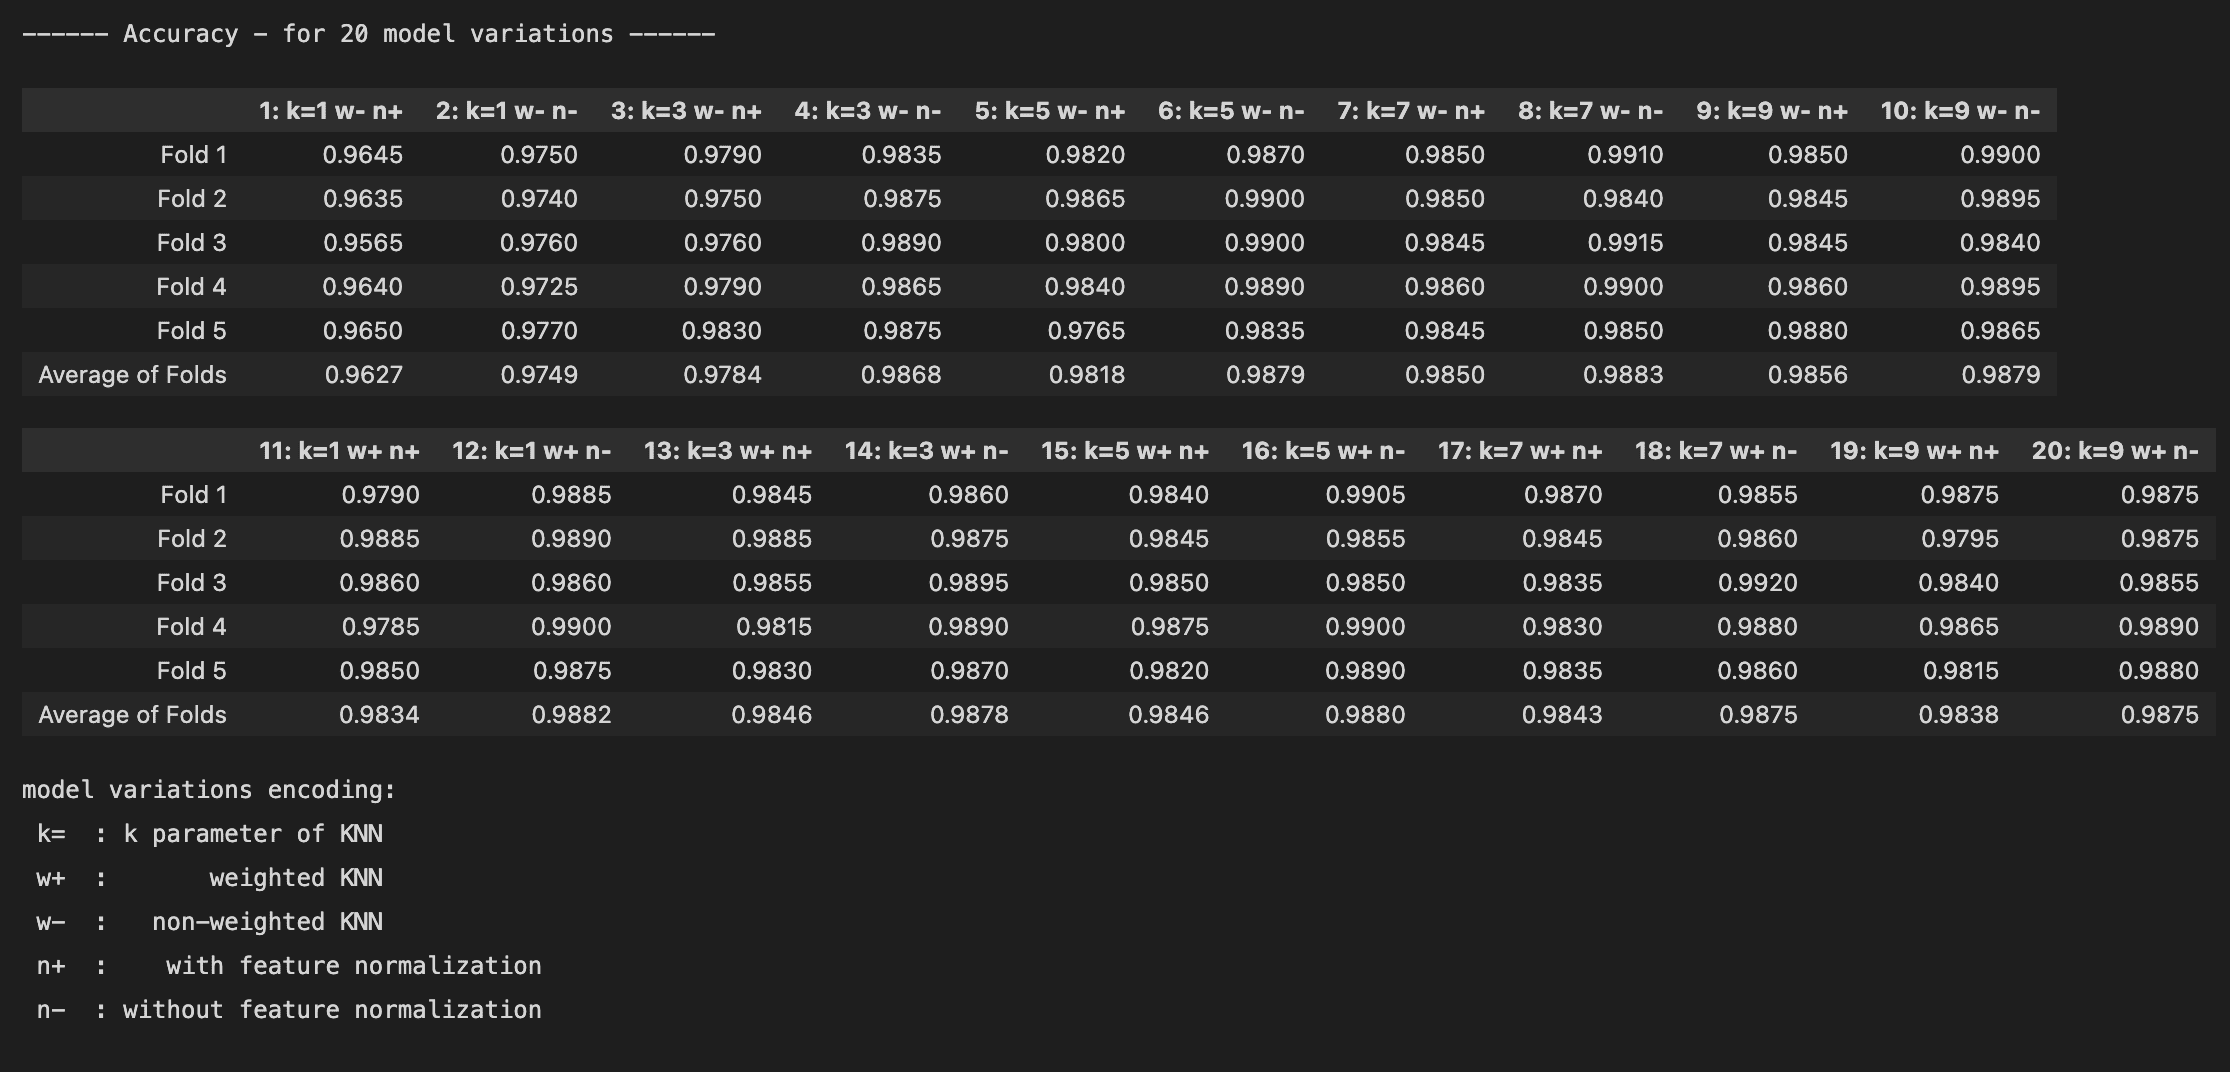

# Precision Results Table

In [ ]:
def draw_precision_table():
    print("------ Precision - for 20 model variations ------")
    precision_rows = np.transpose(np.array(precision_table_columns))
    precision_table = pd.DataFrame(precision_rows, columns = ['1: k=1 w- n+','2: k=1 w- n-','3: k=3 w- n+','4: k=3 w- n-','5: k=5 w- n+','6: k=5 w- n-','7: k=7 w- n+','8: k=7 w- n-','9: k=9 w- n+','10: k=9 w- n-','11: k=1 w+ n+','12: k=1 w+ n-','13: k=3 w+ n+','14: k=3 w+ n-','15: k=5 w+ n+','16: k=5 w+ n-','17: k=7 w+ n+','18: k=7 w+ n-','19: k=9 w+ n+','20: k=9 w+ n-'])
    precision_table.index = ['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5', 'Average of Folds']

    display(precision_table.iloc[:, :10].head(6))
    display(precision_table.iloc[:, 10:].head(6))

    print("model variations encoding: \n k=  : k parameter of KNN \n w+  :       weighted KNN \n w-  :   non-weighted KNN \n n+  :    with feature normalization \n n-  : without feature normalization \n")

draw_precision_table()

------ Precision - for 20 model variations ------


,1: k=1 w- n+,2: k=1 w- n-,3: k=3 w- n+,4: k=3 w- n-,5: k=5 w- n+,6: k=5 w- n-,7: k=7 w- n+,8: k=7 w- n-,9: k=9 w- n+,10: k=9 w- n-
Fold 1,0.964931,0.975168,0.979575,0.983745,0.982096,0.987054,0.984926,0.991138,0.985189,0.990488
Fold 2,0.963493,0.974289,0.975090,0.987569,0.986388,0.990114,0.985068,0.984485,0.984691,0.989504
Fold 3,0.956300,0.975652,0.975711,0.988692,0.980101,0.990182,0.984816,0.991562,0.984917,0.984084
Fold 4,0.964323,0.972851,0.978742,0.986759,0.983876,0.988699,0.985986,0.990225,0.986165,0.989465
Fold 5,0.965049,0.977203,0.983165,0.988015,0.976901,0.983499,0.984388,0.984856,0.987689,0.986730
Average of Folds,0.962819,0.975033,0.978457,0.986956,0.981872,0.987910,0.985037,0.988453,0.985730,0.988054


,11: k=1 w+ n+,12: k=1 w+ n-,13: k=3 w+ n+,14: k=3 w+ n-,15: k=5 w+ n+,16: k=5 w+ n-,17: k=7 w+ n+,18: k=7 w+ n-,19: k=9 w+ n+,20: k=9 w+ n-
Fold 1,0.979140,0.988587,0.984398,0.985933,0.983995,0.990601,0.987326,0.985271,0.987389,0.988169
Fold 2,0.988541,0.988852,0.988575,0.987664,0.984403,0.985467,0.984774,0.986314,0.979564,0.987426
Fold 3,0.985990,0.986343,0.985762,0.989589,0.984820,0.985038,0.983225,0.992135,0.984215,0.985262
Fold 4,0.978856,0.989977,0.982044,0.989305,0.987463,0.989724,0.982838,0.987977,0.986498,0.988880
Fold 5,0.985090,0.987503,0.983079,0.986972,0.982141,0.989050,0.983022,0.986275,0.981226,0.987906
Average of Folds,0.983523,0.988252,0.984772,0.987893,0.984564,0.987976,0.984237,0.987594,0.983779,0.987529


model variations encoding: 
 k=  : k parameter of KNN 
 w+  :       weighted KNN 
 w-  :   non-weighted KNN 
 n+  :    with feature normalization 
 n-  : without feature normalization 



#### Previously calculated:
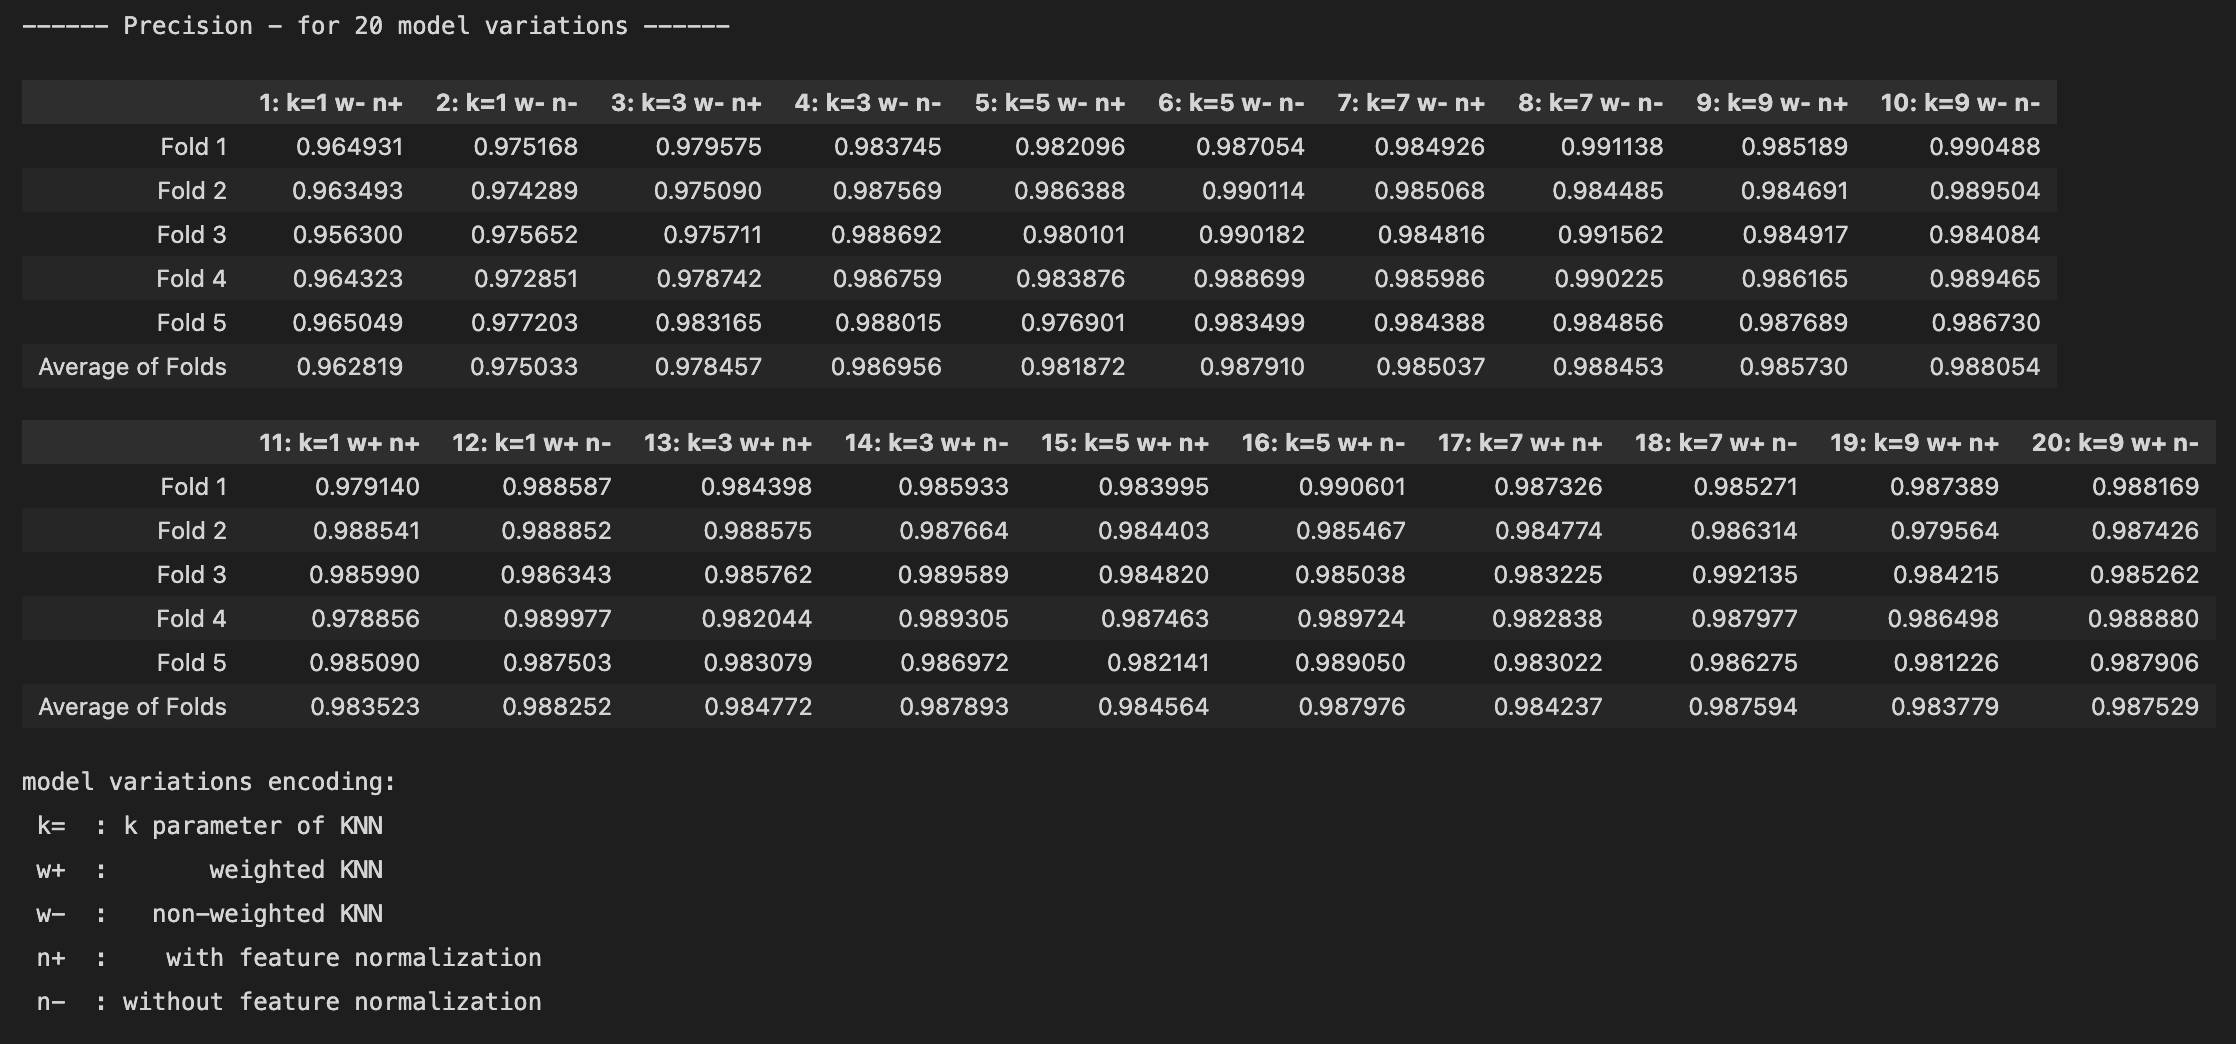

# Recall Results Table

In [ ]:
def draw_recall_table():
    print("------ Recall - for 20 model variations ------")
    recall_rows = np.transpose(np.array(recall_table_columns))
    recall_table = pd.DataFrame(recall_rows, columns = ['1: k=1 w- n+','2: k=1 w- n-','3: k=3 w- n+','4: k=3 w- n-','5: k=5 w- n+','6: k=5 w- n-','7: k=7 w- n+','8: k=7 w- n-','9: k=9 w- n+','10: k=9 w- n-','11: k=1 w+ n+','12: k=1 w+ n-','13: k=3 w+ n+','14: k=3 w+ n-','15: k=5 w+ n+','16: k=5 w+ n-','17: k=7 w+ n+','18: k=7 w+ n-','19: k=9 w+ n+','20: k=9 w+ n-'])
    recall_table.index = ['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5', 'Average of Folds']

    display(recall_table.iloc[:, :10].head(6))
    display(recall_table.iloc[:, 10:].head(6))

    print("model variations encoding: \n k=  : k parameter of KNN \n w+  :       weighted KNN \n w-  :   non-weighted KNN \n n+  :    with feature normalization \n n-  : without feature normalization \n")

draw_recall_table()

------ Recall - for 20 model variations ------


,1: k=1 w- n+,2: k=1 w- n-,3: k=3 w- n+,4: k=3 w- n-,5: k=5 w- n+,6: k=5 w- n-,7: k=7 w- n+,8: k=7 w- n-,9: k=9 w- n+,10: k=9 w- n-
Fold 1,0.964879,0.974979,0.979374,0.983124,0.982098,0.987231,0.984686,0.991006,0.985051,0.990108
Fold 2,0.963946,0.974364,0.975125,0.987568,0.986453,0.990096,0.985274,0.984587,0.984269,0.989460
Fold 3,0.956482,0.975630,0.975891,0.989293,0.980243,0.989838,0.984498,0.991673,0.984258,0.984340
Fold 4,0.964213,0.972436,0.978936,0.986719,0.984230,0.989184,0.986366,0.990025,0.986338,0.989577
Fold 5,0.964989,0.976846,0.983303,0.987393,0.976480,0.983704,0.984770,0.984648,0.988402,0.986043
Average of Folds,0.962902,0.974851,0.978526,0.986819,0.981901,0.988010,0.985119,0.988388,0.985664,0.987905


,11: k=1 w+ n+,12: k=1 w+ n-,13: k=3 w+ n+,14: k=3 w+ n-,15: k=5 w+ n+,16: k=5 w+ n-,17: k=7 w+ n+,18: k=7 w+ n-,19: k=9 w+ n+,20: k=9 w+ n-
Fold 1,0.979304,0.988582,0.984669,0.986152,0.983794,0.990322,0.986863,0.985967,0.987335,0.987637
Fold 2,0.988731,0.988752,0.988371,0.987625,0.984495,0.985386,0.984031,0.985918,0.979358,0.987495
Fold 3,0.985669,0.985824,0.985575,0.990030,0.985215,0.985110,0.983652,0.992063,0.984191,0.985655
Fold 4,0.978392,0.989751,0.981451,0.989091,0.987412,0.990144,0.982775,0.988243,0.986532,0.988647
Fold 5,0.985144,0.987582,0.982972,0.986831,0.981797,0.988959,0.983493,0.986273,0.982077,0.988344
Average of Folds,0.983448,0.988098,0.984608,0.987946,0.984543,0.987984,0.984163,0.987693,0.983899,0.987556


model variations encoding: 
 k=  : k parameter of KNN 
 w+  :       weighted KNN 
 w-  :   non-weighted KNN 
 n+  :    with feature normalization 
 n-  : without feature normalization 



#### Previously calculated:
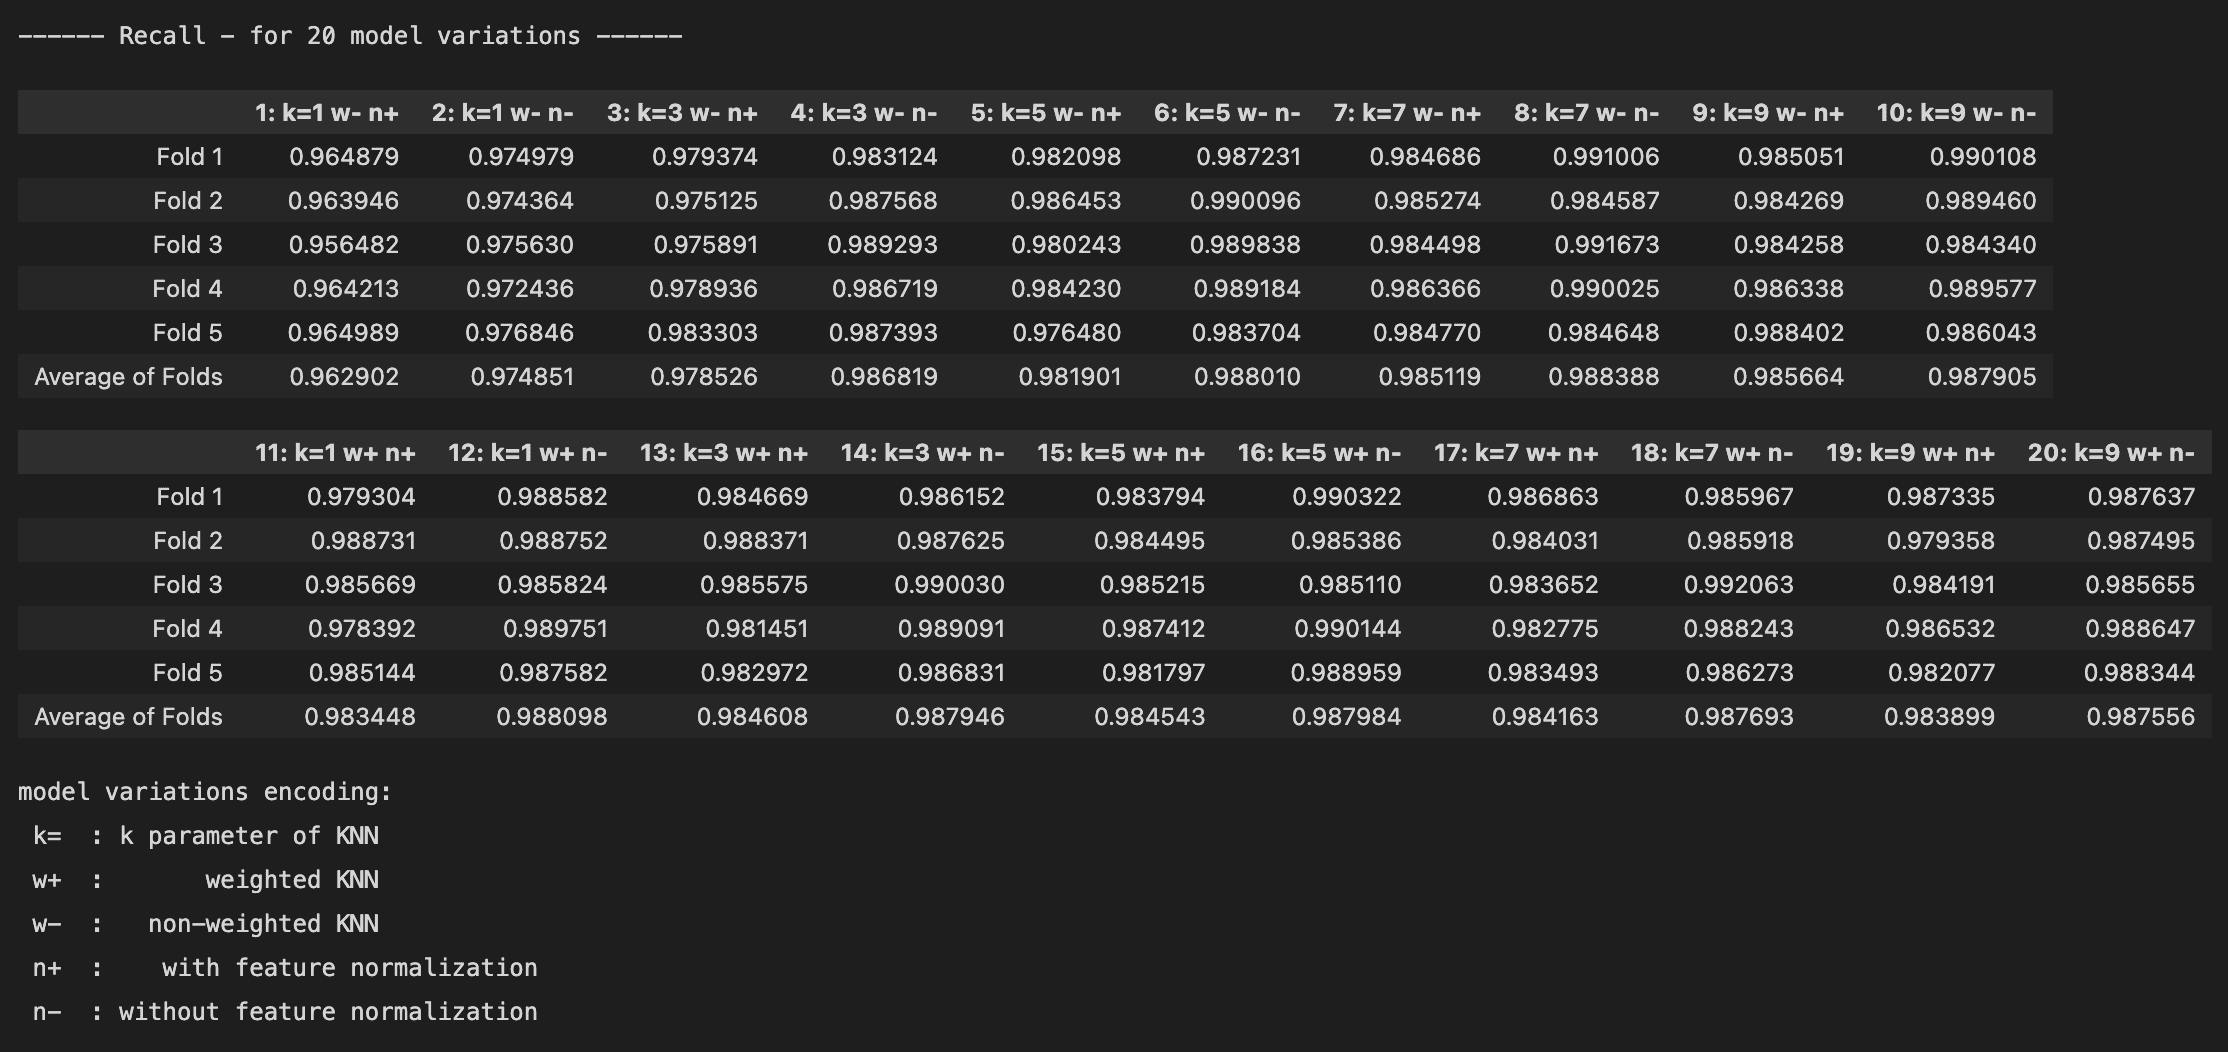

# Error Analysis for classification
<br />

All 20 KNN variations performed well considering results: accuracy > 96% , precision > 96% , recall > 96%  at the same time.

Yet, overall, model no 8 is the best performing, having the highest accuracy-precision-recall at the same time. Model 8 parameters are: non-weighted KNN, k=7 , no feature normalization.

<br />

## Important system parameters to consider for the classification:

<br />

#### **1.   k (number of neighbors) for the KNN algorithm**
From the results we get from our experiments, there isn't necessarily a clear relation between the parameter k and accuracy-precision-recall. In our experiments, we have used the values (1, 3, 5, 7, 9) for variations of k, obtained very close results (differences mostly less than 0.005%).

Though, it can be said that, the general trend for the accuracy-precision-recall for the k parameter is:  higher values of k results higher precision rates until k=7. In our implementation for the KNN classifier, there's no computational overhead of using greater k values. Performance-wise, since euclidian distances are calculated for all test samples against whole training-set, there is no difference.
<br /> <br />


#### **2.   Feature normalization**
From the results we get from our experiments, it was seen that, using MinMax scaling decreased our prediction performance for this dataset. Without feature normalization we obtain slightly (around 0.005%) better accuracy-precision-recall results than with feature normalization.

As we have shown some answers for some questions range from narrower range than [-3,3] range. Without feature normalization, those questions were effecting the KNN prediction less than the questions which got more significant answers that are ranging between wider values.

Therefore, it can be said that questions with a small answer range are not as effective as questions with a wider answer range, in reality, in some sense. But it should be kept in mind that, we have only experimented with MinMaxScaler. And there can be some feature normalization algorithms which can increase our model's prediction performance.

<br /> <br />

#### **3.   Weighted / Uniform (non-Weighted) KNN**
From the results we get from our experiments, there isn't necessarily a clear relation between weighted KNN and uniform (non-weighted) KNN. There are very slightly (0.005%) better/worse comparisons, yet they are insignificant to establish a pattern or trend.

That is interesting, and the explanation comes to our minds is that, the samples are distributed in an almost homogenous (uniform) way that distances are very similar values, thus all neighbors of a test sample are roughly equal distance from it.

That said, for the lower values of k neighbors parameter, weighted KNN performs around 0.01% better than uniform KNN (for all accuracy, precision, and recall). Our heuristic explanation is that, when there are fewer neighbors, classification can get effected by noise more. Thus weighted KNN is more noise-tolerable: noisy neighbours are somewhat muted because of their farther distance.

And for the higher values of k, uniform KNN gives slightly (0.005%) better prediction results than weighted KNN.

<br /> <br />

#### **4.   Distance metric that is used at KNN**
From the results we get from our experiments, there isn't necessarily a clear relation between distance metric (euclidian, manhattan, etc.) and prediction success. We didn't include this variation in our tables to not overfill the table.
<br /> <br />
#### **5.   Number of folds at cross validation**
The k-fold cross validation is well-known for evaluating models' real world performance more accurately. The more folds, the bigger portions of data can be trained-tested against each other. However, that comes with a cost of computation time. The computation time and amount of folds is directly proportional in that sense.

Comparison between individual folds does not yield any meaning since dataset is random shuffled before split. Average of folds is the decision metric for comparing performance of different model variations.

<br /><br />
#### **Our heuristic favorite parameters**
As team "Epoche", our go-to parameters for this dataset:
    k=7,
    uniform distance (non-weighted) KNN  ( since same classification performance, in less time to compute ),
    euclidean distance as distance metric,
    no feature scaling.


## **Comments on Misclassifications**

<br />

Here, we will show a few misclassified samples, and ask their neighbors why they were misclassified.

In [ ]:
print(" \n3 misclassified samples and their neighbors will be ready in about  1  MINUTE  of execution. Please wait... \n")

cv = KFold(5,shuffle=True, random_state=24)
X_train, X_test, y_train, y_test = next(cv.split(X,Y))
knnUniform = KNNClassifier(n_neighbors=7, weights='uniform_neighbors', n_classes=numberOfClasses)
knnUniform.fit(X_train, y_train)

misclassifiedNum = 1
predictions, neighbors = knnUniform.predict(X_test)

print("3 misclassified examples in  model no 8:  k=7, non-weighted KNN, no feature normalization:\n ")

for i in range(2000):
    if predictions[i] != y_test[i]:
        print("misclassified sample " + str(misclassifiedNum) +" :")
        print("  Predicted label: " + str(predictions[i]) + "(" + personality_types[predictions[i]] + ")")
        print("  Actual label:    " + str(y_test[i]) + "(" + personality_types[y_test[i]] + ")")
        print("  nearest Neighbours:  ", end =" ")
        for neighbour in neighbors[i]:
             print(str(y_train[neighbour]) + "(" + personality_types[y_train[neighbour]] + ")", end =" ")
        print("\n")
        misclassifiedNum +=1

    if misclassifiedNum >3:
        break


 
3 misclassified samples and their neighbors will be ready in about  1  MINUTE  of execution. Please wait... 

3 misclassified examples in  model no 8:  k=7, non-weighted KNN, no feature normalization:
 
misclassified sample 1 :
  Predicted label: 11(ENFP)
  Actual label:    8(ESTP)
  nearest Neighbours:   11(ENFP) 11(ENFP) 11(ENFP) 11(ENFP) 11(ENFP) 11(ENFP) 11(ENFP) 

misclassified sample 2 :
  Predicted label: 9(ESFP)
  Actual label:    2(ESFJ)
  nearest Neighbours:   9(ESFP) 9(ESFP) 9(ESFP) 9(ESFP) 9(ESFP) 9(ESFP) 9(ESFP) 

misclassified sample 3 :
  Predicted label: 4(ISTJ)
  Actual label:    14(INTP)
  nearest Neighbours:   4(ISTJ) 14(INTP) 4(ISTJ) 14(INTP) 4(ISTJ) 4(ISTJ) 14(INTP) 



#### Another previously calculated example:

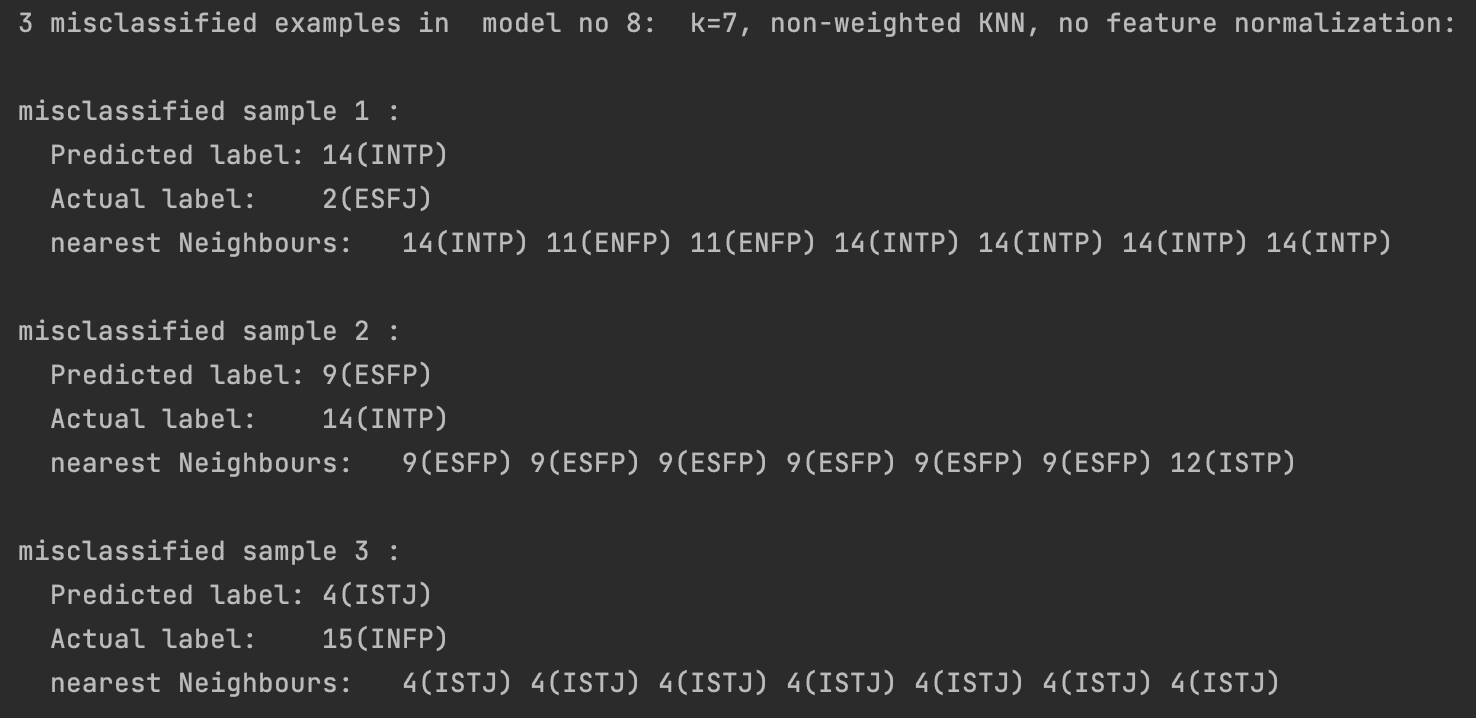


We have 8,000 training samples in a fold, and it is pretty much expected for a sample to have many neighbors of a common class. As it can be seen from the examples, misclassified samples are either some outliers or noise, since there almost is a consensus in majority voting of neighbors, and there is no neighbor that is the same class as the test sample. The result would also be similar in Weighted KNN models since almost all neighbors would again be of same class.

Also consider that, we could for instance think that k=7 would be a much better parameter than k=1, yet above examples warns us to not always trust parameters.

## This is the end of PART 1 .

# PART 2 :  Energy Efficiency Estimation (Regression)

### Contributors:

### Ali Argun Sayilgan   : 21827775
### Mehmet Giray Nacakci :  21989009

## Please run this report with   "RUN ALL" command

# Dataset

Dataset consists of 768 samples with 8 features and two different continuous energy efficiency
output rate (”Heating Load”, ”Cooling Load”) as ground truth values.

In [ ]:
import pandas as pd
import numpy as np
import time

df = pd.read_csv("energy_efficiency_data.csv", encoding='cp1252')
df.describe()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [ ]:
df.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [ ]:
X = df.drop(['Heating_Load', 'Cooling_Load'], axis=1).to_numpy()
Y = df[['Heating_Load', 'Cooling_Load']].to_numpy()

# Preprocessing the dataset
### StandardScaler (Z-Score Standardization)
StandardScaler is used to resize the distribution of values ​​so that the mean of the observed values ​​is 0 and the standard deviation is 1. 
<br /> <br />
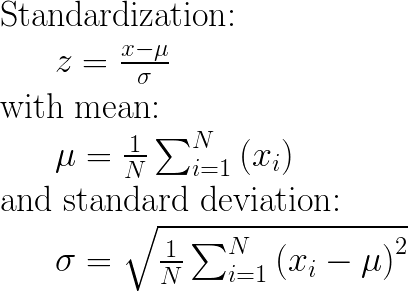

In [ ]:
def StandardScaler():
  def __init__(self):
    None

  def fit_transform(self, X):
    self.mean = np.mean(X)
    self.std = np.std(X)
    return (X - self.mean) / self.std
    
    
  def transform(self, X):
      return (X - self.mean) / self.std

# KNNRegressor

KNN is an instance-based learning method. Instance-based learning (memory-based learning, lazy learning) is a family of learning algorithms that, instead of performing explicit generalization, compare new problem instances with instances seen in training, which have been stored in memory.

There are efficient implementations to store the data using complex data structures like k-d trees to make look-up and matching of new patterns during prediction more efficient. But in this project we will be making use of basic numpy arrays.


## Prediction algorithm
Predictions are made for a new instance (x) by searching through the entire training set for the K most similar instances (the neighbors) and summarizing the output variable for those K instances. For regression this might be the mean output variable, in classification this might be the mode (or most common) class value.

To determine which of the K instances in the training dataset are most similar to a new input a distance measure is used. For real-valued input variables, the most popular distance measure is Euclidean distance.

**Euclidean distance formula:** <br />
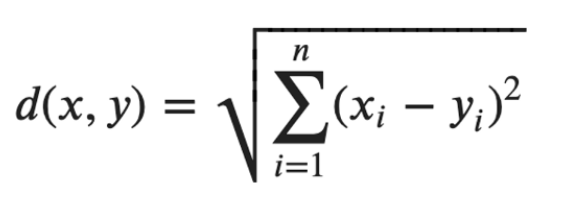

In [ ]:
class KNeighborsRegressor():
    def __init__(self, n_neighbors, weights = 'uniform'):
        self.n_neighbors = n_neighbors
        self.weights = weights
        
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self. y_train = y_train
        
    def euclidian_distance(self, a, b):
        distances = np.sqrt(np.sum((a - b)**2, axis=1))
        # prevent division by zero
        distances[np.where(distances < 0.00001)] = 0.00001
        return distances

    
    def kneighbors(self, X_test, return_distance=False):

        dist = []
        neigh_ind = []

        point_dist = [self.euclidian_distance(x_test, self.X_train) for x_test in X_test]

        for row in point_dist:
            enum_neigh = enumerate(row)
            sorted_neigh = sorted(enum_neigh, key=lambda x: x[1])[:self.n_neighbors]

            ind_list = [tup[0] for tup in sorted_neigh]
            dist_list = [tup[1] for tup in sorted_neigh]
            neigh_ind.append(ind_list)
            dist.append(dist_list)

        if return_distance:
            return np.array(dist), np.array(neigh_ind)

        return np.array(neigh_ind)

    
    def predict(self, X_test):

        if self.weights == 'uniform':
            neighbor_indices_of_all_rows = self.kneighbors(X_test)

            y_pred = []
            for row in neighbor_indices_of_all_rows:
                neighbors_y_sum_heating = 0
                neighbors_y_sum_cooling = 0

                # predicted value is the average value of neighbors
                for neighbor_index in row:
                    neighbors_y_sum_heating += self.y_train[neighbor_index][0]
                    neighbors_y_sum_cooling += self.y_train[neighbor_index][1]
                y_pred.append([neighbors_y_sum_heating / len(row), neighbors_y_sum_cooling / len(row)])

            return np.array(y_pred)


        # Weighted KNN
        elif self.weights == 'distance':

            neighbor_distances_of_all_rows, neighbor_indices_of_all_rows = self.kneighbors(X_test, return_distance=True)
            inverse_distances_of_all_rows = 1 / neighbor_distances_of_all_rows
            y_pred = []

            for i, row in enumerate(inverse_distances_of_all_rows):
                neighbors_weighted_y_sum_heating = 0
                neighbors_weighted_y_sum_cooling = 0

                # predicted value is the weighted average value of neighbors
                for j, inverse_distance in enumerate(row):
                    neighbors_weighted_y_sum_heating += inverse_distance * self.y_train[neighbor_indices_of_all_rows[i][j]][0]
                    neighbors_weighted_y_sum_cooling += inverse_distance * self.y_train[neighbor_indices_of_all_rows[i][j]][1]

                y_pred.append([neighbors_weighted_y_sum_heating / np.sum(row), neighbors_weighted_y_sum_cooling / np.sum(row)])

            return np.array(y_pred)

# Regression metrics

A model is only as important as the metric used to evaluate it.

If you choose the wrong metric to evaluate your models, you are likely to choose a poor model, or in the worst case, be misled about the expected performance of your model.

In this part of the experiment we will be using **Mean Absolute Error(MAE)** metric to evaluate our ML models' predictions.

### MAE <br />
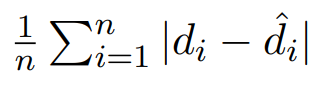
<br />
Mean absolute error refers to average of the magnitude of difference between the prediction of an observation and the true value of that observation. When there is more than one output in the prediction, the meanf of the means absolute errors can get considered.

In [ ]:
def MAE(pred, actual, multi_output=None):
    mae = np.sum(np.absolute((pred.astype("float") - actual.astype("float"))))
    mae /= float(pred.shape[0] * pred.shape[1]) 
    if multi_output is None:
        return np.average(mae)
    return mae

# Cross validation scores

When evaluating different settings (“hyperparameters”) for estimators, such as the C setting that must be manually set for an SVM, there is still a risk of overfitting on the test set because the parameters can be tweaked until the estimator performs optimally. This way, knowledge about the test set can “leak” into the model and evaluation metrics no longer report on generalization performance. To solve this problem, yet another part of the dataset can be held out as a so-called “validation set”: training proceeds on the training set, after which evaluation is done on the validation set, and when the experiment seems to be successful, final evaluation can be done on the test set.

However, by partitioning the available data into three sets, we drastically reduce the number of samples which can be used for learning the model, and the results can depend on a particular random choice for the pair of (train, validation) sets.

A solution to this problem is a procedure called cross-validation (CV for short). A test set should still be held out for final evaluation, but the validation set is no longer needed when doing CV. In the basic approach, called k-fold CV, the training set is split into k smaller sets (other approaches are described below, but generally follow the same principles). The following procedure is followed for each of the k “folds”:

A model is trained using  of the folds as training data;

the resulting model is validated on the remaining part of the data (i.e., it is used as a test set to compute a performance measure such as accuracy).

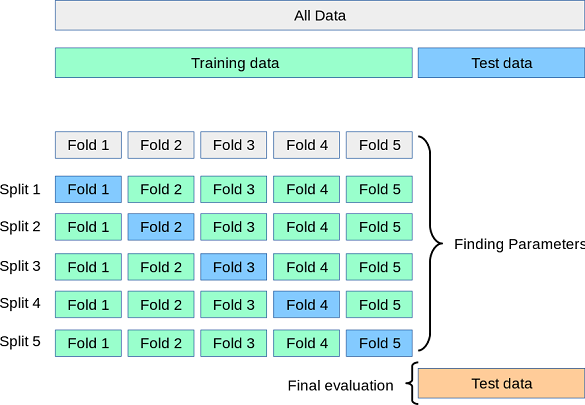


In [ ]:
def cross_val_score(X, Y, cv, pipeline):
    mae_heating_folds = []
    mae_cooling_folds = []

    # for each Fold of 5-fold-validation
    for (x_train, x_test, y_train, y_test) in cv.split(X,Y): 
        y_pred = pipeline.execute(x_train, x_test, y_train)

        mae_heating_folds.append(MAE(y_pred[:, [0]], y_test[:, [0]]))
        mae_cooling_folds.append(MAE(y_pred[:, [1]], y_test[:, [1]]))

    # averages of folds
    mae_heating_folds.append(sum(mae_heating_folds)/5)
    mae_cooling_folds.append(sum(mae_cooling_folds)/5)

    return mae_heating_folds, mae_cooling_folds

# Run non-weighted and weighted KNN models   (20 variations)

In [ ]:
cv = KFold(5, shuffle=True, random_state=24)
scaler = MinMaxScaler()
neighborVariations = [1,3,5,7,9]

heatingTable_columns = []
coolingTable_columns = []


def run_all_models():
    print(" \nResults of 20 KNN model variations will be ready in less than  30 SECONDS.  Please wait... \n")
    start = time.time()


    """  ***   NON-WEIGHTED KNN   *** """
    for k in neighborVariations:  # THIS LOOP TAKES LESS THAN 15 SECONDS TO COMPLETE
        knnUniform = KNeighborsRegressor(n_neighbors=k, weights='uniform')

        # with feature normalization
        pipeline = Pipeline(scaler=scaler, classifier=knnUniform)
        heating_MAEs, cooling_MAEs = cross_val_score(X, Y, cv, pipeline)
        heatingTable_columns.append(heating_MAEs)
        coolingTable_columns.append(cooling_MAEs)

        # without feature normalization
        pipeline = Pipeline(classifier=knnUniform)
        heating_MAEs, cooling_MAEs = cross_val_score(X, Y, cv, pipeline)
        heatingTable_columns.append(heating_MAEs)
        coolingTable_columns.append(cooling_MAEs)


    """  ***   WEIGHTED KNN   *** """
    for k in neighborVariations:   # THIS LOOP TAKES LESS THAN 15 SECONDS TO COMPLETE
        knnDistance = KNeighborsRegressor(n_neighbors=k, weights='distance')

        # with feature normalization
        pipeline = Pipeline(scaler=scaler, classifier=knnDistance)
        heating_MAEs, cooling_MAEs = cross_val_score(X, Y, cv, pipeline)
        heatingTable_columns.append(heating_MAEs)
        coolingTable_columns.append(cooling_MAEs)

        # without feature normalization
        pipeline = Pipeline(classifier=knnDistance)
        heating_MAEs, cooling_MAEs = cross_val_score(X, Y, cv, pipeline)
        heatingTable_columns.append(heating_MAEs)
        coolingTable_columns.append(cooling_MAEs)


    # model calculations are finished.
    finish = time.time()
    seconds = finish-start
    print("Results of 20 KNN model variations are ready in the sections below. Thank you for your patience.")
    print('Elapsed time is:   %d   seconds\n' %seconds)

run_all_models()

 
Results of 20 KNN model variations will be ready in less than  30 SECONDS.  Please wait... 

Results of 20 KNN model variations are ready in the sections below. Thank you for your patience.
Elapsed time is:   3   seconds



# Heating and Cooling  -  Cross Validation Scores

In [ ]:
print("\n------ HEATING LOAD - Mean Absolute Errors - for 20 model variations ------\n")
heating_rows = np.transpose(np.array(heatingTable_columns))
heating_table = pd.DataFrame(heating_rows, columns = ['1: k=1 w- n+','2: k=1 w- n-','3: k=3 w- n+','4: k=3 w- n-','5: k=5 w- n+','6: k=5 w- n-','7: k=7 w- n+','8: k=7 w- n-','9: k=9 w- n+','10: k=9 w- n-','11: k=1 w+ n+','12: k=1 w+ n-','13: k=3 w+ n+','14: k=3 w+ n-','15: k=5 w+ n+','16: k=5 w+ n-','17: k=7 w+ n+','18: k=7 w+ n-','19: k=9 w+ n+','20: k=9 w+ n-'])
heating_table.index = ['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5', 'Average of Folds']

display(heating_table.iloc[:, :10].head(6))
display(heating_table.iloc[:, 10:].head(6))

print("model variations encoding: \n k=  : k parameter of KNN \n w+  :       weighted KNN \n w-  :   non-weighted KNN \n n+  :    with feature normalization \n n-  : without feature normalization \n")



------ HEATING LOAD - Mean Absolute Errors - for 20 model variations ------



,1: k=1 w- n+,2: k=1 w- n-,3: k=3 w- n+,4: k=3 w- n-,5: k=5 w- n+,6: k=5 w- n-,7: k=7 w- n+,8: k=7 w- n-,9: k=9 w- n+,10: k=9 w- n-
Fold 1,2.989216,2.301895,1.803900,1.806645,2.063725,1.384157,1.598609,1.956097,1.878446,2.158591
Fold 2,3.345621,2.615817,1.905686,1.696514,2.173686,1.557778,1.750392,1.816517,1.946565,2.297712
Fold 3,2.883072,2.560980,2.025359,1.609847,1.961935,1.464719,1.947647,1.903940,1.706645,2.004205
Fold 4,2.524575,2.639935,1.942505,2.023747,1.755556,1.661007,1.791662,1.957395,1.760240,2.019434
Fold 5,2.867179,2.693013,2.026218,1.797564,1.974026,1.964782,2.128306,1.510531,1.763198,1.942279
Average of Folds,2.921933,2.562328,1.940734,1.786864,1.985786,1.606488,1.843323,1.828896,1.811019,2.084444


,11: k=1 w+ n+,12: k=1 w+ n-,13: k=3 w+ n+,14: k=3 w+ n-,15: k=5 w+ n+,16: k=5 w+ n-,17: k=7 w+ n+,18: k=7 w+ n-,19: k=9 w+ n+,20: k=9 w+ n-
Fold 1,3.412876,2.631046,2.090664,2.425579,1.623225,2.176419,1.765643,2.370531,1.687369,2.179004
Fold 2,3.291569,2.650784,2.127137,2.300626,1.898944,1.822422,1.654112,2.258044,1.747828,2.267719
Fold 3,3.235621,2.569346,1.665153,2.485266,1.876028,1.934110,1.885658,2.346935,1.982961,2.620807
Fold 4,2.951961,2.462680,1.767548,2.063555,1.930637,2.270665,2.022727,2.053901,1.609218,2.372883
Fold 5,3.393141,2.641474,1.903705,2.330476,1.773210,2.561865,1.868554,2.092966,2.058553,2.235266
Average of Folds,3.257033,2.591066,1.910841,2.321101,1.820409,2.153096,1.839339,2.224476,1.817186,2.335136


model variations encoding: 
 k=  : k parameter of KNN 
 w+  :       weighted KNN 
 w-  :   non-weighted KNN 
 n+  :    with feature normalization 
 n-  : without feature normalization 



#### Previously calculated:
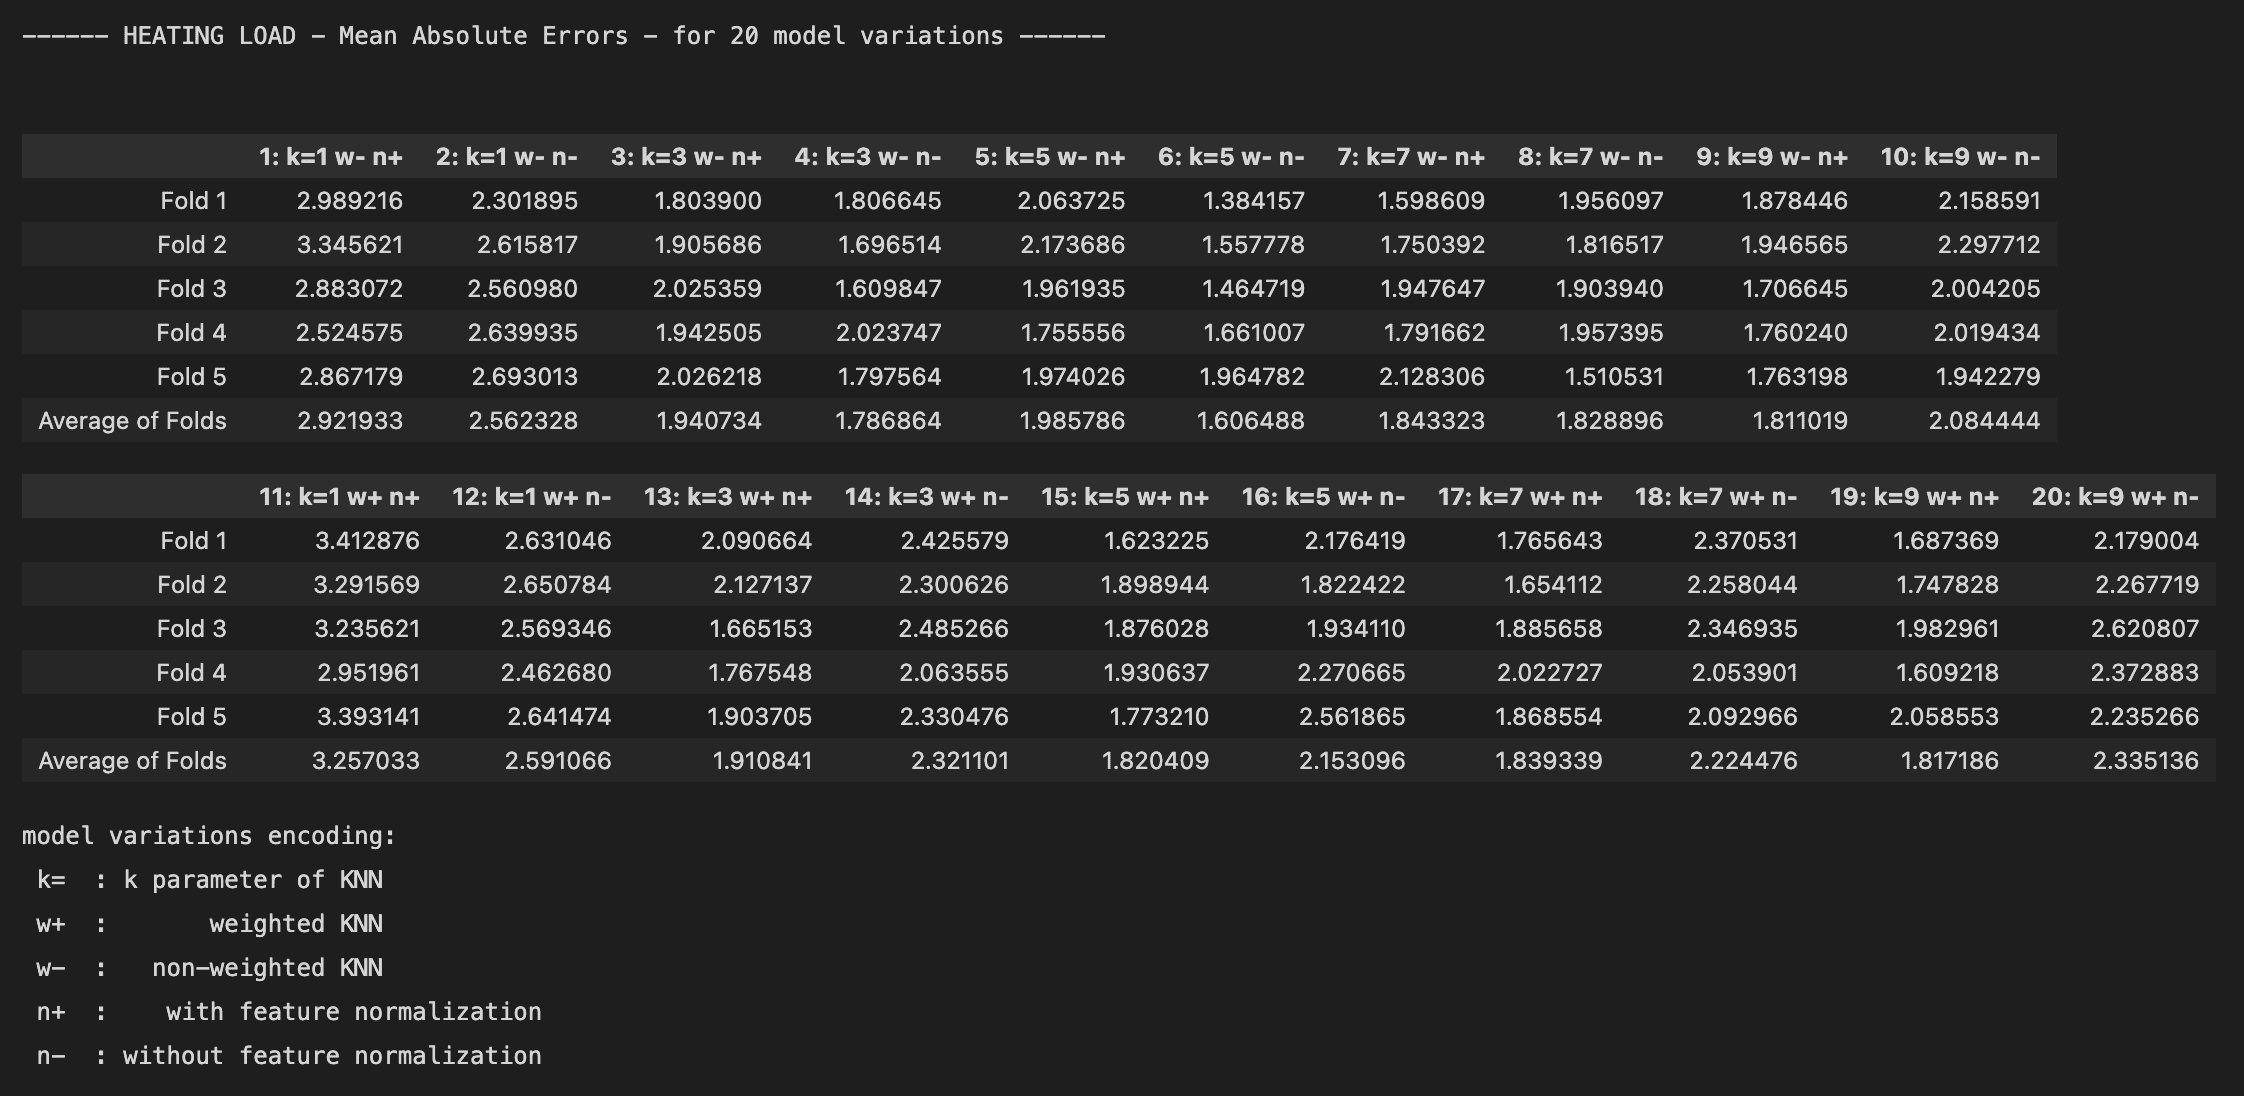

In [ ]:
def draw_cooling_table():
    print("\n------ COOLING LOAD - Mean Absolute Errors - for 20 model variations ------\n")
    cooling_rows = np.transpose(np.array(coolingTable_columns))
    cooling_table = pd.DataFrame(cooling_rows, columns = ['1: k=1 w- n+','2: k=1 w- n-','3: k=3 w- n+','4: k=3 w- n-','5: k=5 w- n+','6: k=5 w- n-','7: k=7 w- n+','8: k=7 w- n-','9: k=9 w- n+','10: k=9 w- n-','11: k=1 w+ n+','12: k=1 w+ n-','13: k=3 w+ n+','14: k=3 w+ n-','15: k=5 w+ n+','16: k=5 w+ n-','17: k=7 w+ n+','18: k=7 w+ n-','19: k=9 w+ n+','20: k=9 w+ n-'])
    cooling_table.index = ['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5', 'Average of Folds']

    display(cooling_table.iloc[:, :10].head(6))
    display(cooling_table.iloc[:, 10:].head(6))

draw_cooling_table()

print("model variations encoding: \n k=  : k parameter of KNN \n w+  :       weighted KNN \n w-  :   non-weighted KNN \n n+  :    with feature normalization \n n-  : without feature normalization \n")



------ COOLING LOAD - Mean Absolute Errors - for 20 model variations ------



,1: k=1 w- n+,2: k=1 w- n-,3: k=3 w- n+,4: k=3 w- n-,5: k=5 w- n+,6: k=5 w- n-,7: k=7 w- n+,8: k=7 w- n-,9: k=9 w- n+,10: k=9 w- n-
Fold 1,3.454379,1.994314,2.138954,1.527364,2.170523,1.318431,1.917740,1.695070,1.913464,1.973268
Fold 2,3.585556,2.193922,2.201264,1.465664,2.289895,1.361739,2.017628,1.574015,2.031707,1.974728
Fold 3,3.133333,1.996863,2.024118,1.342397,2.269974,1.334654,2.061615,1.628133,1.831438,1.664880
Fold 4,2.973922,2.221111,2.223268,1.695142,1.889856,1.580667,2.049160,1.666443,2.025614,1.773704
Fold 5,3.172244,2.182436,2.401154,1.511538,2.326205,1.639295,2.201474,1.640348,2.282707,1.898098
Average of Folds,3.263887,2.117729,2.197751,1.508421,2.189291,1.446957,2.049524,1.640802,2.016986,1.856936


,11: k=1 w+ n+,12: k=1 w+ n-,13: k=3 w+ n+,14: k=3 w+ n-,15: k=5 w+ n+,16: k=5 w+ n-,17: k=7 w+ n+,18: k=7 w+ n-,19: k=9 w+ n+,20: k=9 w+ n-
Fold 1,3.747320,2.110196,2.299300,1.887068,1.956115,1.719075,1.929064,1.849520,1.832990,1.663711
Fold 2,3.490654,2.156340,2.244139,1.818534,2.193241,1.445443,1.917912,1.754219,1.888450,1.804060
Fold 3,3.628824,2.150523,1.906790,1.897509,2.276759,1.474466,2.065931,1.859025,2.020338,1.968695
Fold 4,3.252418,2.061961,2.120229,1.639312,2.116966,1.684017,2.168310,1.546770,1.998426,2.037894
Fold 5,3.466859,2.183654,1.968563,1.818072,1.923312,1.938500,2.190620,1.656567,2.563711,1.714519
Average of Folds,3.517215,2.132535,2.107804,1.812099,2.093279,1.652300,2.054367,1.733220,2.060783,1.837776


model variations encoding: 
 k=  : k parameter of KNN 
 w+  :       weighted KNN 
 w-  :   non-weighted KNN 
 n+  :    with feature normalization 
 n-  : without feature normalization 



#### Previously calculated:
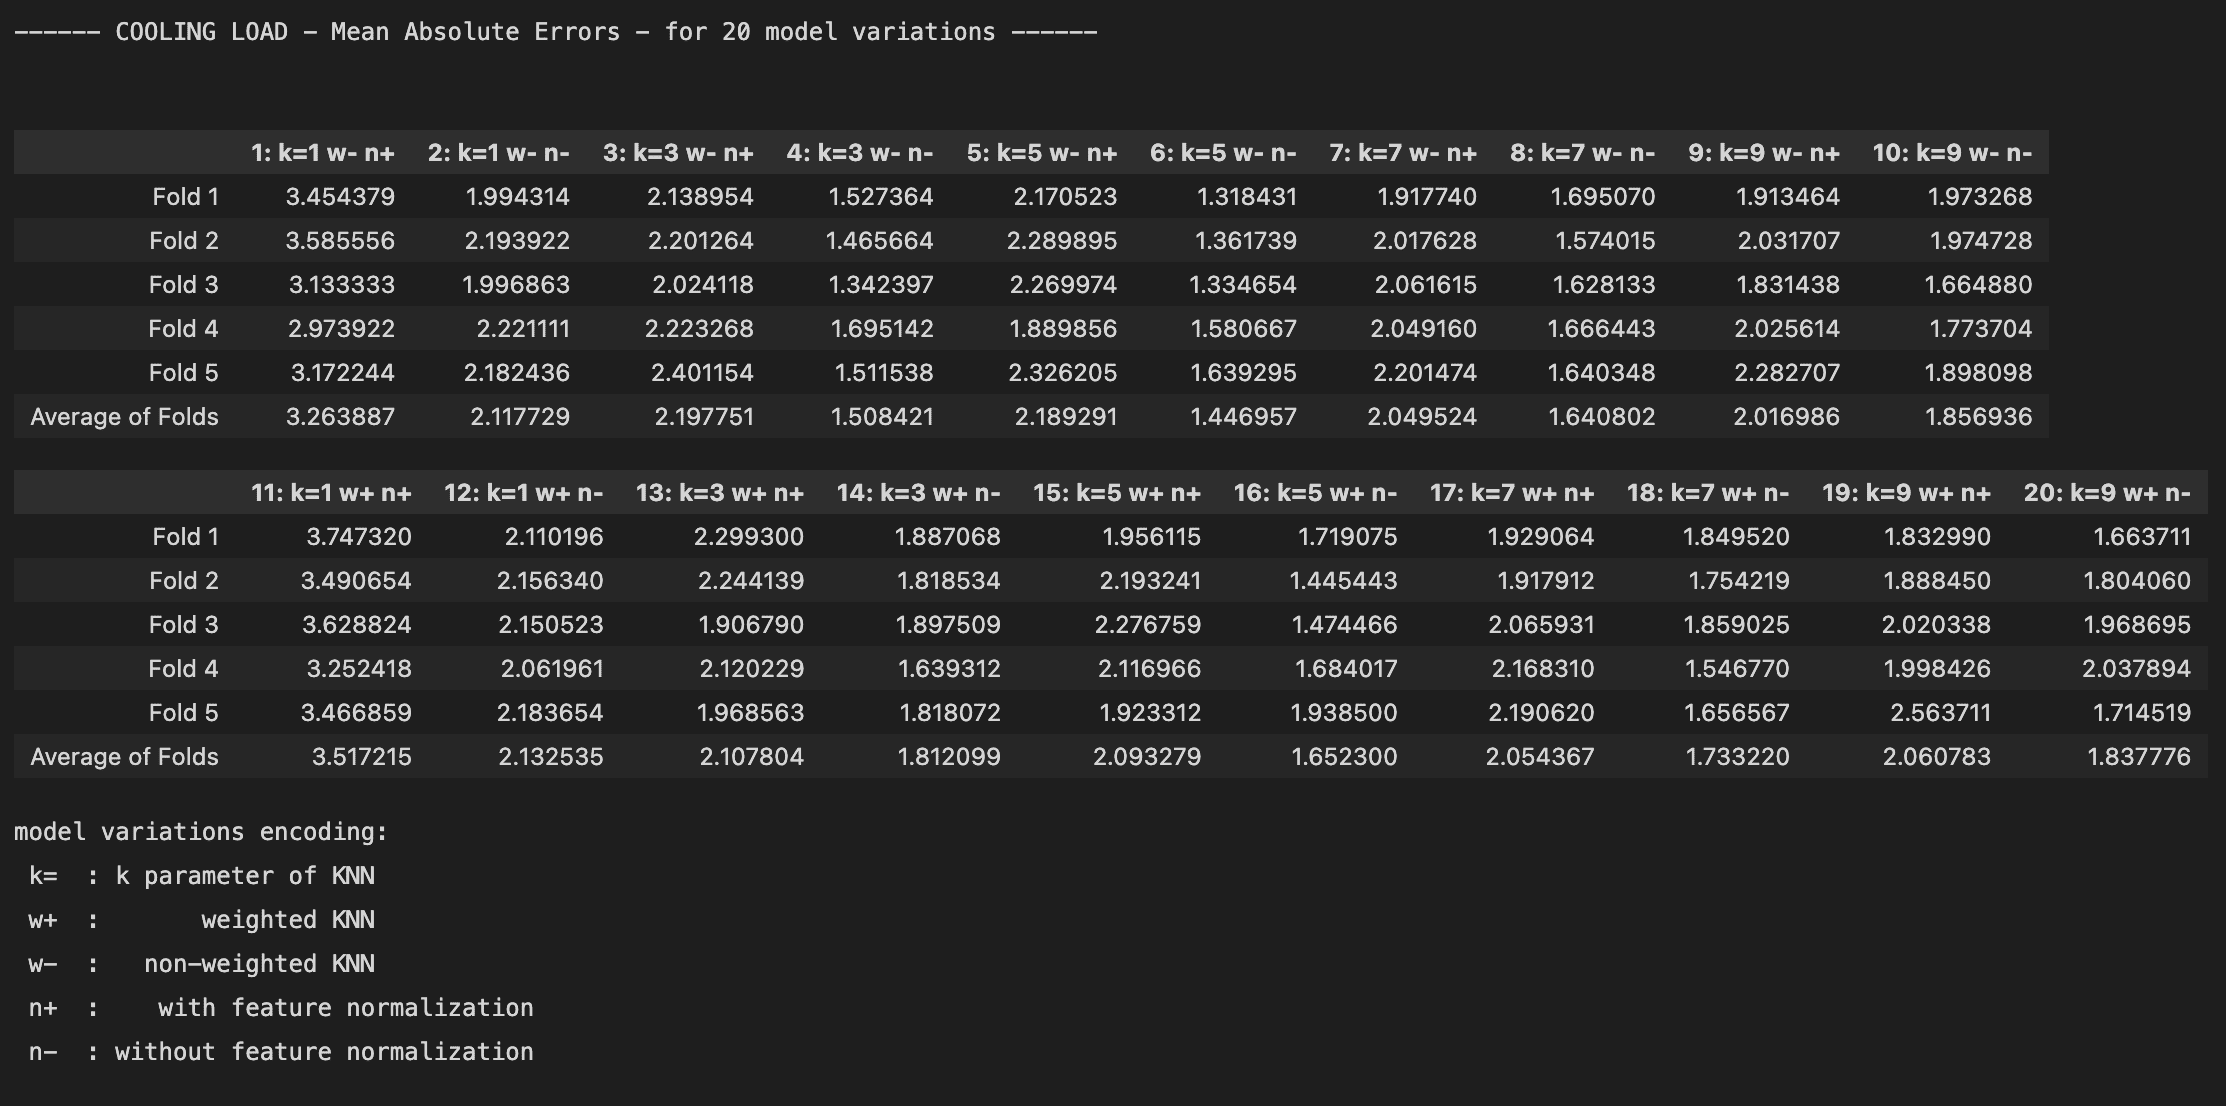

# Error Analysis for Regression

<br />

Overall, model no 6 is the best performing model, both for heating and cooling.  Model 6 parameters are:  non-weighted KNN, k=5 , no feature normalization.

<br />

### Important system parameters to consider:
<br /> 

Below analyses are interpreted from both Heating_Load and Coooling_Load mean-absolute-error results of 20 KNN model variations obtained in above chapters. Since interpretations are similar, same discussion holds both for heating and cooling  predictions.

<br />

#### **1.   k (number of neighbors) for the KNN algorithm**
From the results we get from our experiments, we obtained the best model performance (least mean-absolute-errors) with k as 5. As k parameter increased from 1 to 5, errors showed a decreasing trend (from over-fitting towards fitting); and from 5 to 9, from fitting towards perhaps under-fitting.

In our implementation for the KNN, there's no computation time difference while using different k values. Since euclidian distances are calculated for all test samples against whole training-set, even when k=1, again no difference.
<br /> <br />

#### **2.   Feature normalization**
In general, we see from our experiments that data with feature normalization performs worse than without. With feature normalization we obtain more mean-absolute error, not as expected. (Except heating_load performing better normalized than non-normalized in weighted KNN, as expected or desired).

This implies that, maybe in reality, higher magnitude (or wider range) features such as Surface_Area, Wall_Area, Roof_Area had more effect on the heating and cooling loads, yet we prevented their dominance.

Another reason could be: We scaled test data features according to the min-max range values of training data features, in order to prevent bias. Yet, this cannot ensure if all test data will be scaled into [0,1] range, and out-of-range values will contribute to error.

Because of our confusion, we also implemented and tested  Z-SCORE SCALING  for comparison, and results can be found in the next chapter below.

<br /> <br />

#### **3.   Weighted / Uniform (non-Weighted) KNN**
From the results we get from our experiments, we almost generally obtain better performance (less error) with Uniform KNN regressor models compared to Weighted distance ones. And k parameter of KNN does not seem to have an effect on this trend.

That is interesting, and the explanation comes to our minds is that, the samples are distributed in an almost homogenous (uniform) way that distances are very similar values, thus all neighbors of a test sample are roughly equal distance from it.

<br /> <br />

#### **4.   Distance metric that is used at KNN**
From the results we get from our experiments, there isn't necessarily a clear relation between distance metric (euclidian, manhattan, etc.)and prediction success. We didn't include this variation in our tables to not overfill the table.
<br /> <br />
#### **5.   Number of folds at cross validation**
The k-fold cross validation is well-known for evaluating models' real world performance more accurately. The more folds, the bigger portions of data can be trained-tested against each other. However, that comes with a cost of computation time. The computation time and amount of folds is directly proportional in that sense.

Comparison between individual folds does not yield any meaning since dataset is random shuffled before split. Average of folds is the decision metric for comparing performance of different model variations.


# Testing Z-Score Standardization for Scaling instead of MIN-MAX normalization, for Cooling_Load

In [ ]:
scaler = StandardScaler()
coolingTable_columns = []

run_all_models()
draw_cooling_table()

print("model variations encoding: \n k=  : k parameter of KNN \n w+  :       weighted KNN \n w-  :   non-weighted KNN \n n+  :  Scaling with feature  STANDARDIZATION \n n-  :  no Scaling \n")

 
Results of 20 KNN model variations will be ready in less than  30 SECONDS.  Please wait... 

Results of 20 KNN model variations are ready in the sections below. Thank you for your patience.
Elapsed time is:   3   seconds


------ COOLING LOAD - Mean Absolute Errors - for 20 model variations ------



,1: k=1 w- n+,2: k=1 w- n-,3: k=3 w- n+,4: k=3 w- n-,5: k=5 w- n+,6: k=5 w- n-,7: k=7 w- n+,8: k=7 w- n-,9: k=9 w- n+,10: k=9 w- n-
Fold 1,2.105033,2.158170,1.328758,1.375599,1.453712,1.366850,1.522176,1.636555,1.946224,1.955011
Fold 2,2.304118,2.168366,1.524946,1.589913,1.293686,1.323137,1.719384,1.576433,1.580044,1.895715
Fold 3,2.208954,2.009281,1.728214,1.446776,1.413542,1.383765,1.554024,1.708049,1.716231,1.876275
Fold 4,2.056078,2.128497,1.392636,1.477386,1.540471,1.428235,1.659430,1.651727,1.892636,1.742818
Fold 5,2.126538,2.146346,1.420556,1.340235,1.303987,1.396487,1.757610,1.608791,1.928504,1.720014
Average of Folds,2.160144,2.122132,1.479022,1.445982,1.401080,1.379695,1.642525,1.636311,1.812728,1.837967


,11: k=1 w+ n+,12: k=1 w+ n-,13: k=3 w+ n+,14: k=3 w+ n-,15: k=5 w+ n+,16: k=5 w+ n-,17: k=7 w+ n+,18: k=7 w+ n-,19: k=9 w+ n+,20: k=9 w+ n-
Fold 1,2.011111,2.038824,1.764830,1.925746,1.665540,2.034577,1.898533,1.791706,1.679546,1.812006
Fold 2,2.237059,2.004314,1.777285,1.872421,1.807382,1.586750,1.754623,2.085212,1.919347,1.780603
Fold 3,2.175948,2.204771,1.857878,1.967813,1.421155,1.664669,1.765286,1.567013,1.881817,1.725875
Fold 4,2.324444,2.260784,1.852443,1.839328,1.718704,1.621694,1.848155,1.859085,1.722861,1.872816
Fold 5,2.216346,2.164103,1.603257,1.805989,1.839321,1.563012,1.648157,1.917108,1.951460,1.877252
Average of Folds,2.192982,2.134559,1.771139,1.882259,1.690421,1.694140,1.782951,1.844025,1.831006,1.813710


model variations encoding: 
 k=  : k parameter of KNN 
 w+  :       weighted KNN 
 w-  :   non-weighted KNN 
 n+  :  Scaling with feature  STANDARDIZATION 
 n-  :  no Scaling 



#### Previously calculated:
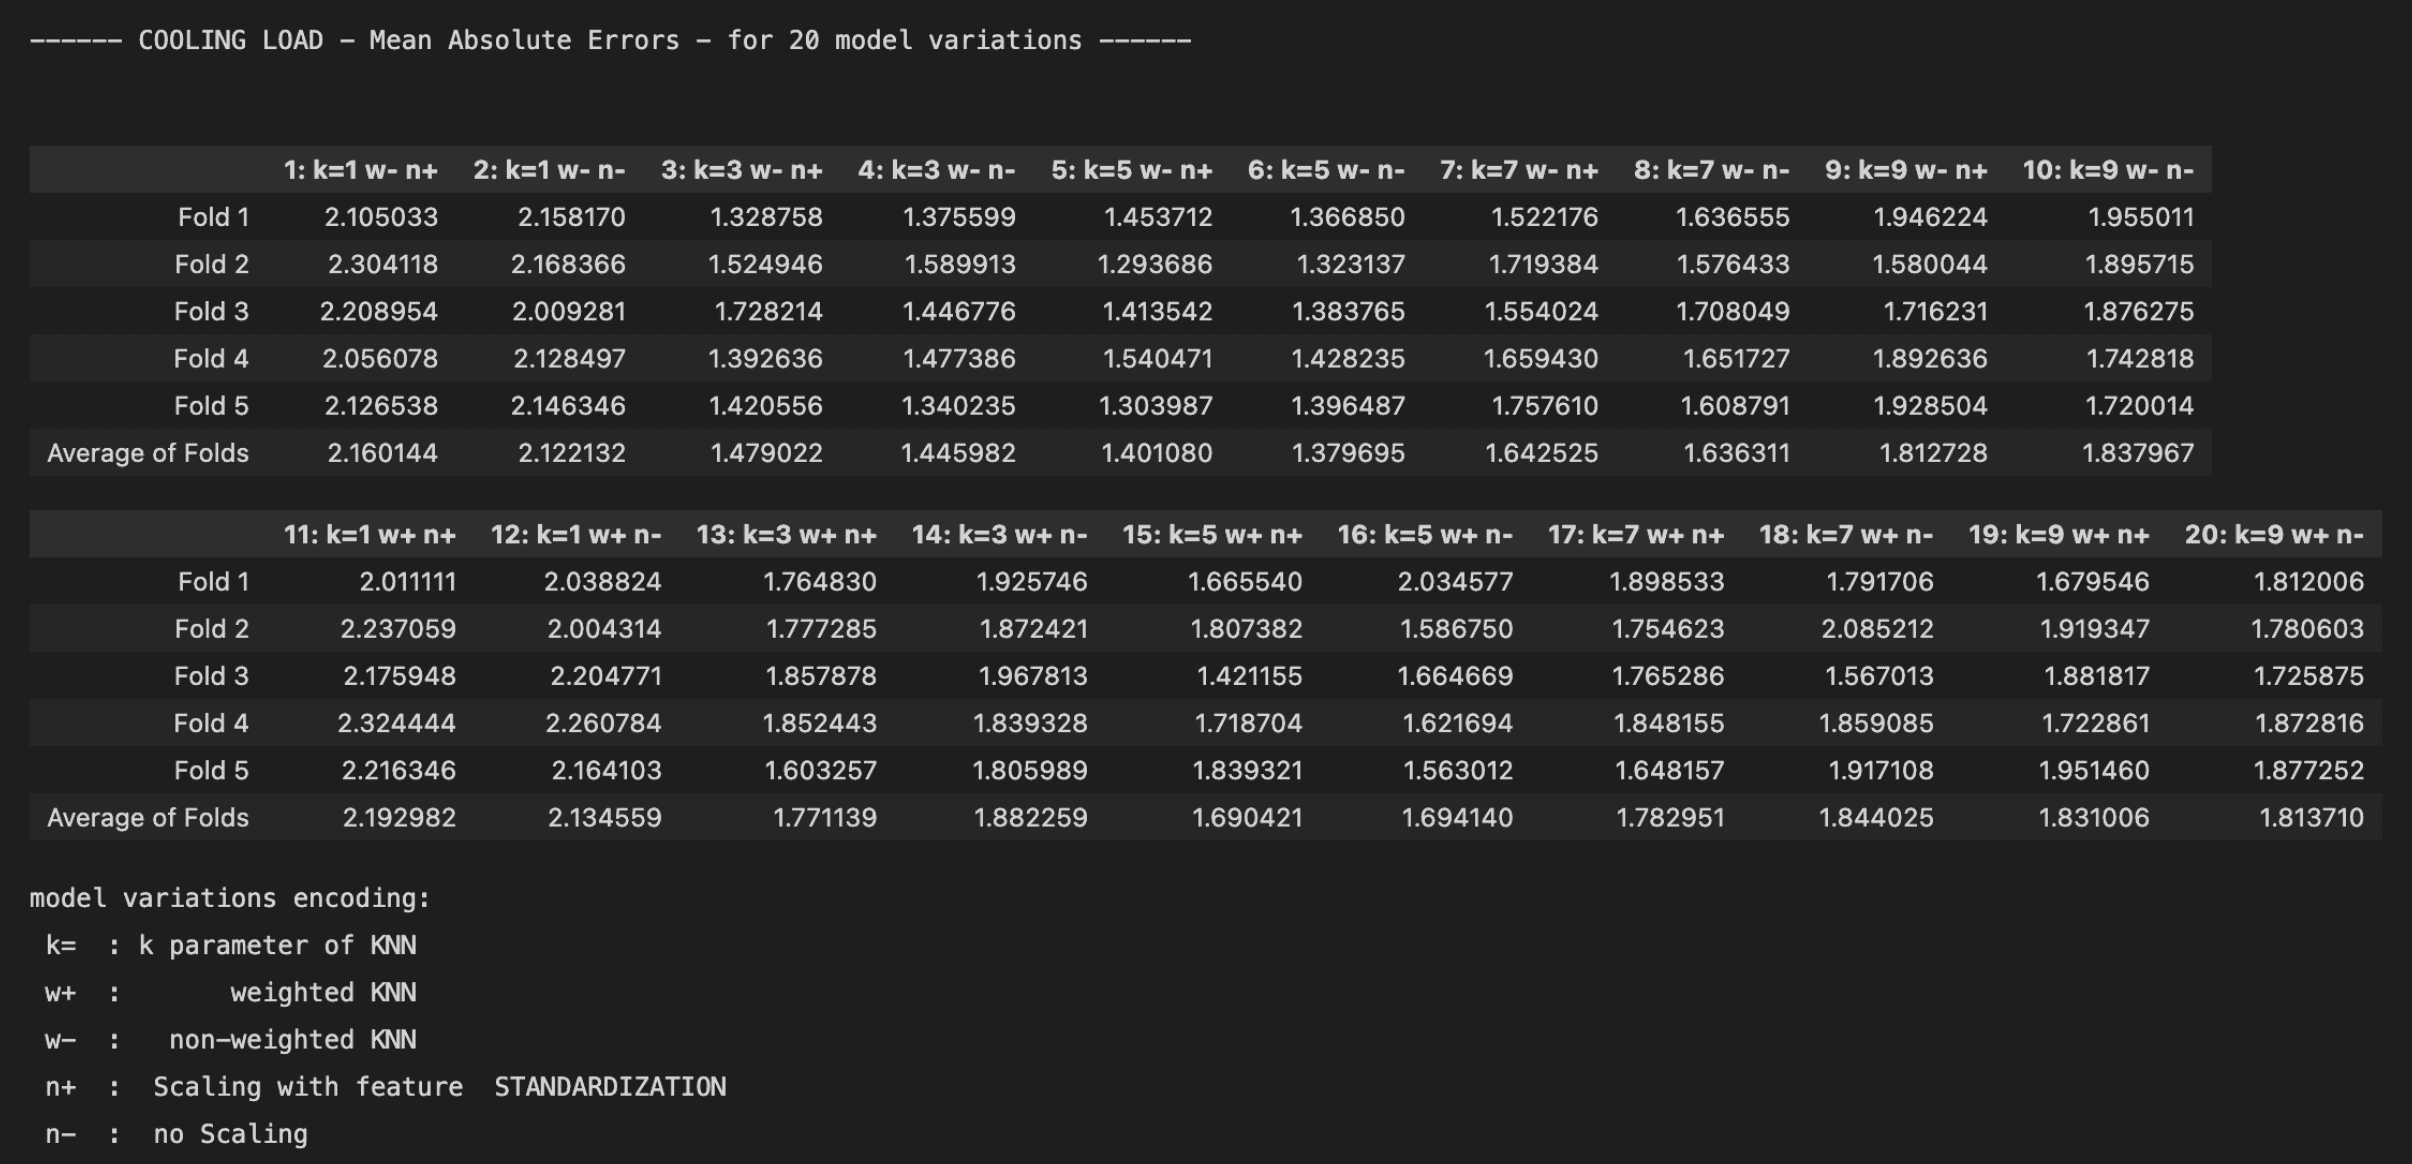



As seen above, Standardization clearly produces less error than min-max normalization (compared to previous section results). And in higher k parameters, sometimes achieves better results than non-scaled data, as expected.

From here we may interpret that, since energy efficiency is a real world problem, the data follows a Normal (Gaussian) Distribution. Many physical phenomena such as temperature, population age, error measurements and so on, are modelled and approximated by Gaussian Distribution (a bell-shaped, symmetrical curve). And Standardization is known to perform better than Normalization when data follows a Gaussian distribution.

#### This is the end of our report.